# EDA

## 0. 필요한 함수 import

In [3]:
# !pip install numpy
# !pip install pandas
# !pip install matplotlib
# !pip install seaborn

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# 한글폰트 설정
# 한글폰트 설정
import matplotlib
import matplotlib.font_manager as fm

font_path = "C:\\Windows\\Fonts\\GULIM.TTC" # 윈도우OS 폰트경로
font_prop = fm.FontProperties(fname=font_path)
font_name = font_prop.get_name() # 폰트명
matplotlib.rc('font', family=font_name)
plt.rc('axes', unicode_minus=False) # matplotlib이 기본적으로 사용하는 유니코드 마이너스 비활성화, 아스키코드 마이너스 사용)

In [6]:
# 구글 colab에서 한 흔적
# from google.colab import drive
# drive.mount('/content/drive')

## 1. 데이터 수집 및 로딩

In [7]:
# 자료 출처: https://www.kaggle.com/datasets/unsdsn/world-happiness
# World Happiness Report 2015 ~ 2019
happiness_2015_df = pd.read_csv("data/2015.csv")
happiness_2016_df = pd.read_csv("data/2016.csv")
happiness_2017_df = pd.read_csv("data/2017.csv")
happiness_2018_df = pd.read_csv("data/2018.csv")
happiness_2019_df = pd.read_csv("data/2019.csv")
print(happiness_2015_df.head())
print(happiness_2016_df.head())
print(happiness_2017_df.head())
print(happiness_2018_df.head())
print(happiness_2019_df.head())


       Country          Region  Happiness Rank  Happiness Score  \
0  Switzerland  Western Europe               1            7.587   
1      Iceland  Western Europe               2            7.561   
2      Denmark  Western Europe               3            7.527   
3       Norway  Western Europe               4            7.522   
4       Canada   North America               5            7.427   

   Standard Error  Economy (GDP per Capita)   Family  \
0         0.03411                   1.39651  1.34951   
1         0.04884                   1.30232  1.40223   
2         0.03328                   1.32548  1.36058   
3         0.03880                   1.45900  1.33095   
4         0.03553                   1.32629  1.32261   

   Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                   0.94143  0.66557                        0.41978   
1                   0.94784  0.62877                        0.14145   
2                   0.87464  0.64938           

## 2. 데이터 구조 및 변수 이해

In [8]:
print(happiness_2015_df.info())
print(happiness_2016_df.info())
print(happiness_2017_df.info())
print(happiness_2018_df.info())
print(happiness_2019_df.info())

'''
happiness_2015_df:
158개의 index(0~157), 12개의 컬럼, 결측치 0, 0 Country와 1 Region은 object 타입, 2 Happiness Rank는 int64타입, 나머지는 전부 float64타입 확인

happiness_2016_df:
157개의 index(0~156), 13개의 컬럼, 결측치 0, 0 Country와 1 Region은 object 타입, 2 Happiness Rank는 int64타입, 나머지는 전부 float64타입 확인

happiness_2017_df:
155개의 index(0~154), 12개의 컬럼, 결측치 0, 0 Country는 object 타입, 1 Happiness Rank는 int64타입, 나머지는 전부 float64타입 확인

happiness_2018_df:
156개의 index(0~155), 9개의 컬럼, 결측치 8 Perceptions of corruption에 1, 0 Overall rank는 int64 타입, 1 Country or Region은 object타입, 나머지는 전부 float64타입 확인

happiness_2019_df:
156개의 index(0~155), 9개의 컬럼, 결측치 0, 0 Overall rank는 int64 타입, 1 Country or Region은 object타입, 나머지는 전부 float64타입 확인
'''



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

'\nhappiness_2015_df:\n158개의 index(0~157), 12개의 컬럼, 결측치 0, 0 Country와 1 Region은 object 타입, 2 Happiness Rank는 int64타입, 나머지는 전부 float64타입 확인\n\nhappiness_2016_df:\n157개의 index(0~156), 13개의 컬럼, 결측치 0, 0 Country와 1 Region은 object 타입, 2 Happiness Rank는 int64타입, 나머지는 전부 float64타입 확인\n\nhappiness_2017_df:\n155개의 index(0~154), 12개의 컬럼, 결측치 0, 0 Country는 object 타입, 1 Happiness Rank는 int64타입, 나머지는 전부 float64타입 확인\n\nhappiness_2018_df:\n156개의 index(0~155), 9개의 컬럼, 결측치 8 Perceptions of corruption에 1, 0 Overall rank는 int64 타입, 1 Country or Region은 object타입, 나머지는 전부 float64타입 확인\n\nhappiness_2019_df:\n156개의 index(0~155), 9개의 컬럼, 결측치 0, 0 Overall rank는 int64 타입, 1 Country or Region은 object타입, 나머지는 전부 float64타입 확인\n'

## 3. 데이터 요약 및 기술 통계

In [9]:
# 각 연도별 DataFrame을 딕셔너리에 저장해서 관리
dfs = {
    '2015': happiness_2015_df,
    '2016': happiness_2016_df,
    '2017': happiness_2017_df,
    '2018': happiness_2018_df,
    '2019': happiness_2019_df
}

# 수치형 변수 기술 통계 확인
print("##### 수치형 변수 기술 통계 #####")
for year, df in dfs.items():
    print(f"\n--- {year} 데이터 ---")
    # 연도별로 행복 점수 컬럼 이름이 다른 점 고려 ('Happiness Score' 또는 'Score')
    # 다른 요인 컬럼 이름도 조금씩 다름 ('Family' vs 'Social support', 'Health' vs 'Healthy life expectancy', 'Trust' vs 'Perceptions of corruption')
    # 여기서는 데이터프레임에 있는 모든 수치형 컬럼에 대해 describe()를 적용
    # include='number' 옵션으로 수치형 컬럼만 선택
    print(df.describe(include='number'))


# 범주형 변수(Region) 빈도 확인
print("\n##### 범주형 변수 (Region) 빈도 확인 #####")
# 'Region' 컬럼은 모든 연도 데이터에 일관되게 있는지 확인 필요.
# 소스 상 2015, 2016 데이터에는 'Region' 컬럼이 명확함
# 2017년 소스에는 'Region' 컬럼명이 직접 보이진 않고, 2018, 2019년 소스에서는 'Country or region' 이라는 컬럼이 있지만 이건 국가 이름인 것으로 보임.
# 따라서 'Region' 컬럼이 있는 연도에 대해서만 빈도를 확인
region_column_name = 'Region' # 2015, 2016년 컬럼명

for year, df in dfs.items():
    # 해당 연도 데이터에 'Region' 컬럼이 있는지 확인
    if region_column_name in df.columns:
        print(f"\n--- {year} 데이터 - {region_column_name} 빈도 ---")
        print(df[region_column_name].value_counts().head(10))
        print(df[region_column_name].value_counts())
    # 2018, 2019년의 'Country or region' 컬럼은 국가 이름이므로, 지역 빈도 확인에는 부적합함.
    # 필요하다면 'Country or region' 컬럼으로 국가 리스트나 특정 국가 빈도 확인은 가능하지만,
    # 목표인 '지역별 행복도'와는 거리가 있어서 여기서는 'Region' 컬럼만 사용
    # 만약 'Country or region' 컬럼의 고유값을 보고 싶다면:
    # elif 'Country or region' in df.columns:
    #     print(f"\n--- {year} 데이터 - Country or region 고유값 개수 ---")
    #     print(df['Country or region'].nunique()) # 고유 국가 개수
    #     print("Country or region 컬럼은 국가 이름이 포함되어 Region 컬럼과는 다릅니다.")


# 이 결과를 보면서 어떤 점을 알 수 있을까?
# 1. describe() 결과:
#    - count: 각 컬럼에 데이터가 몇 개 있는지. Year 2018의 Perceptions of corruption에 결측치 1개가 있는게 보임 (count가 155로 다른 컬럼의 156보다 작음)
#    - mean: 각 컬럼의 평균값. 연도별 평균 행복 점수나 다른 요인들의 평균 변화를 여기서 1차로 볼 수 있음.
#    - std: 표준편차. 데이터가 평균으로부터 얼마나 퍼져 있는지. 표준편차가 클수록 데이터가 더 다양하게 분포되어 있다는 뜻
#    - min, max: 최소값과 최대값. 데이터 범위 파악에 중요해. 혹시 예상치 못한 아주 크거나 작은 값이 있다면 이상치일 가능성도 대략 짐작할 수 있음.
#    - 25%, 50%(median), 75%: 데이터의 사분위수. 데이터의 중간값과 분포 형태를 이해하는 데 도움이 됨. 50% 값이 mean 값과 많이 다르면 데이터가 한쪽으로 치우쳐(왜곡되어) 있다는 신호 가능성
# 2. value_counts() 결과:
#    - 각 지역에 속한 국가 수 파악

##### 수치형 변수 기술 통계 #####

--- 2015 데이터 ---
       Happiness Rank  Happiness Score  Standard Error  \
count      158.000000       158.000000      158.000000   
mean        79.493671         5.375734        0.047885   
std         45.754363         1.145010        0.017146   
min          1.000000         2.839000        0.018480   
25%         40.250000         4.526000        0.037268   
50%         79.500000         5.232500        0.043940   
75%        118.750000         6.243750        0.052300   
max        158.000000         7.587000        0.136930   

       Economy (GDP per Capita)      Family  Health (Life Expectancy)  \
count                158.000000  158.000000                158.000000   
mean                   0.846137    0.991046                  0.630259   
std                    0.403121    0.272369                  0.247078   
min                    0.000000    0.000000                  0.000000   
25%                    0.545808    0.856823                  0.439185

## 4. 결측치 및 이상치 탐색

In [10]:
# 결측치 확인
print("\n##### 결측치 확인 #####")
for year, df in dfs.items():
    print(f"\n--- {year} 데이터 결측치 수 ---")
    # isnull()은 각 셀이 결측치인지(True) 아닌지(False) 나타내는 DataFrame을 반환
    # sum()은 각 컬럼별로 True(결측치)의 개수를 합산
    print(df.isnull().sum())

# 이 결과를 보면서 어떤 점을 알 수 있을까?
# 각 연도별 데이터프레임의 모든 컬럼에 대해 결측치의 총 개수가 나올 거야.
# info()에서 확인했듯이 2018년 데이터의 'Perceptions of corruption' 컬럼에서 1개의 결측치를 볼 수 있을 거야 [1, 8].
# 만약 예상치 못한 다른 컬럼이나 다른 연도에서 결측치가 나온다면, 데이터 로딩이나 전 단계에서 문제가 있었는지 다시 확인해봐야 해.

# 이상치 탐색은 주로 시각화 단계(박스 플롯 등)에서 더 명확히 보이지만,
# describe() 결과의 min/max 값이 상식적으로 말이 안 되거나
# 사분위수 범위에서 극단적으로 벗어나 있다면 이상치를 의심해볼 수 있어.
# 예를 들어, Happiness Score가 음수로 나오거나 수백 점으로 나온다면 이상치겠지.
# (다행히 소스 데이터에서는 그런 명확한 이상치는 보이지 않았어)

# 결측치가 있다면 앞으로 이 결측치를 어떻게 처리할지 (제거할지, 다른 값으로 채울지 등) 결정해야 하고
# 이상치가 의심되는 값들이 있다면 그것도 어떻게 처리할지 고민해봐야 해
# 이 단계는 데이터의 '건강 상태'를 체크하는 중요한 과정이야!


##### 결측치 확인 #####

--- 2015 데이터 결측치 수 ---
Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

--- 2016 데이터 결측치 수 ---
Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Lower Confidence Interval        0
Upper Confidence Interval        0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

--- 2017 데이터 결측치 수 ---
Country

## 5. 변수 분포 시각화

EDA 목표 1: 나라별 행복 점수 분포 및 순위 파악을 위한 시각화
--------------------------------------------------


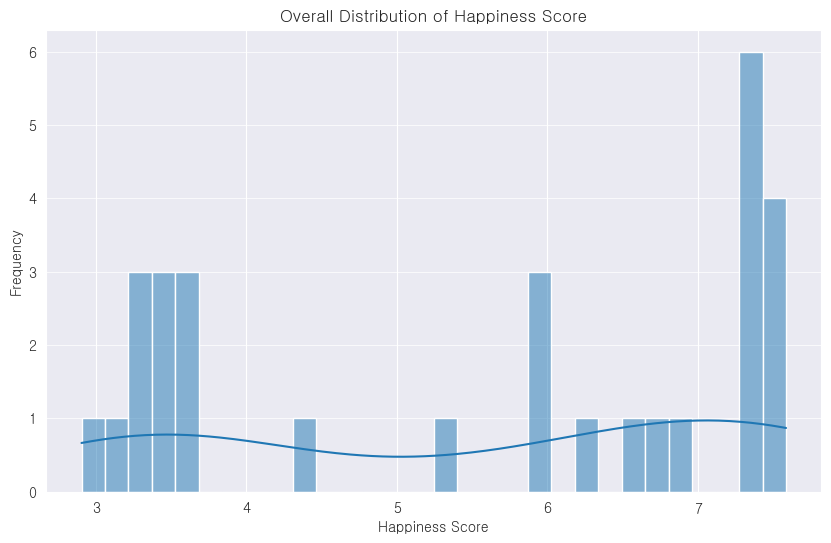


> 히스토그램 분석 결과: 전체 행복 점수가 특정 범위에 집중되어 있는지, 분포가 어떤 모양인지 확인 가능합니다.
--------------------------------------------------


C:\Users\Playdata2\AppData\Local\Temp\ipykernel_11680\137924279.py:49: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(data=df, x='Region', y='Happiness Score', inner='quartile', scale='width', order=region_order)


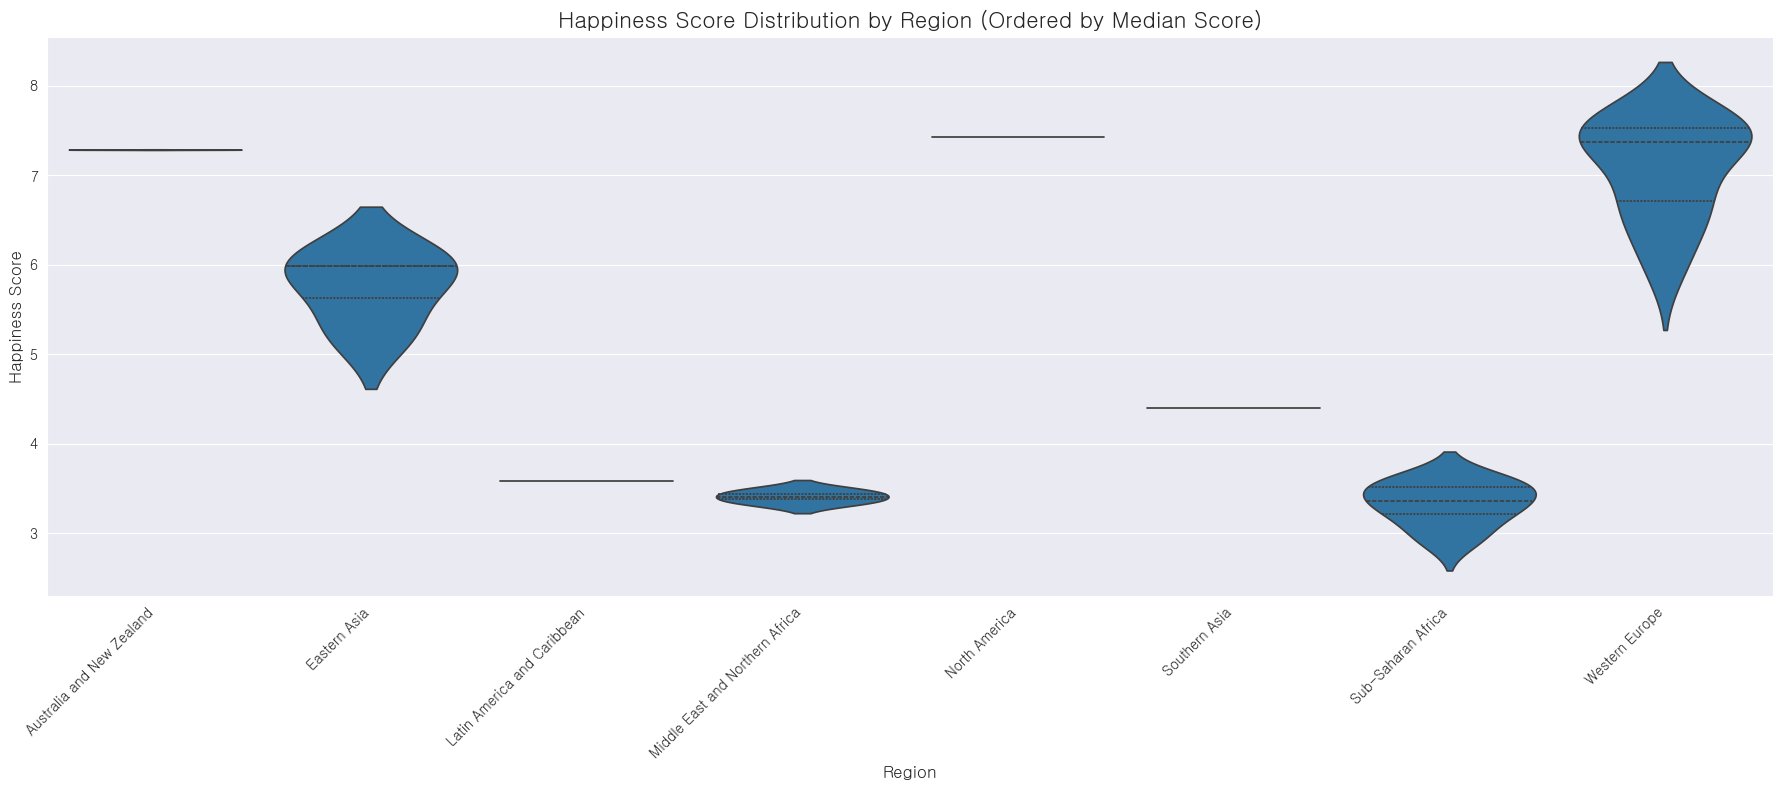


> 개선된 바이올린 플롯 분석 결과: 그래프 크기 확대, 바이올린 폭 통일, 그리고 지역별 중앙값 기준 정렬을 통해 지역별 행복 점수 분포와 순위 차이를 더 명확하게 시각적으로 비교할 수 있습니다.
--------------------------------------------------


C:\Users\Playdata2\AppData\Local\Temp\ipykernel_11680\137924279.py:111: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=combined_df, x='Country', y='Happiness Score', palette='viridis')


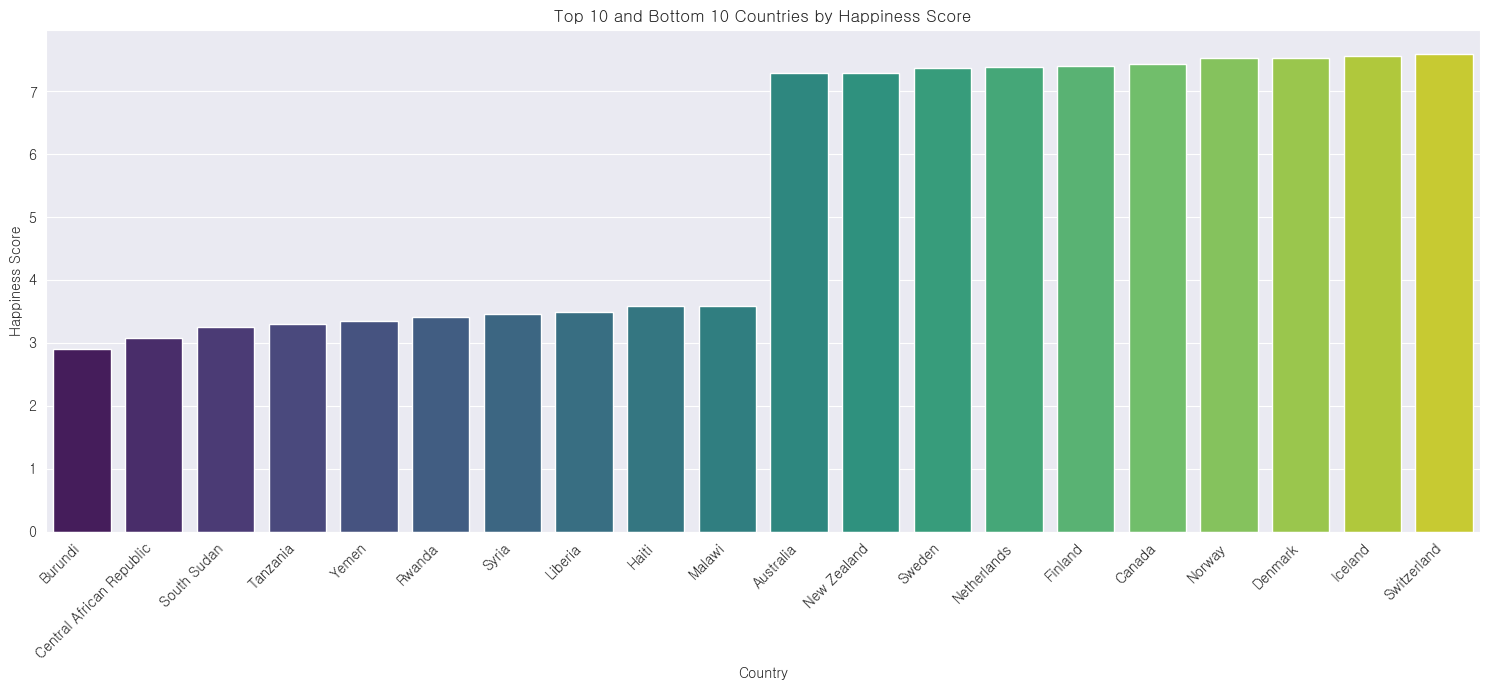


> 막대 그래프 분석 결과: 행복 점수가 가장 높은 상위 10개 국가와 가장 낮은 하위 10개 국가 및 해당 점수를 명확히 비교할 수 있습니다 [3].
--------------------------------------------------


In [11]:
data = {
    'Country': ['Switzerland', 'Iceland', 'Denmark', 'Norway', 'Canada', 'Finland', 'Netherlands', 'Sweden', 'New Zealand', 'Australia',
                'United Kingdom', 'Germany', 'France', 'Spain', 'Italy', 'Japan', 'South Korea', 'China', 'India', 'Botswana',
                'Malawi', 'Haiti', 'Liberia', 'Syria', 'Rwanda', 'Yemen', 'Tanzania', 'South Sudan', 'Central African Republic', 'Burundi'],
    'Region': ['Western Europe', 'Western Europe', 'Western Europe', 'Western Europe', 'North America', 'Western Europe', 'Western Europe', 'Western Europe', 'Australia and New Zealand', 'Australia and New Zealand',
               'Western Europe', 'Western Europe', 'Western Europe', 'Western Europe', 'Western Europe', 'Eastern Asia', 'Eastern Asia', 'Eastern Asia', 'Southern Asia', 'Sub-Saharan Africa',
               'Sub-Saharan Africa', 'Latin America and Caribbean', 'Sub-Saharan Africa', 'Middle East and Northern Africa', 'Sub-Saharan Africa', 'Middle East and Northern Africa', 'Sub-Saharan Africa', 'Sub-Saharan Africa', 'Sub-Saharan Africa', 'Sub-Saharan Africa'],
    'Happiness Rank': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                      21, 26, 29, 36, 50, 46, 47, 79, 118, 146,
                      147, 148, 149, 150, 151, 152, 153, 154, 155, 156],
    'Happiness Score': [7.587, 7.561, 7.527, 7.522, 7.427, 7.406, 7.378, 7.364, 7.286, 7.284,
                        6.867, 6.750, 6.575, 6.329, 5.948, 5.987, 5.984, 5.273, 4.404, 3.590,
                        3.587, 3.582, 3.495, 3.462, 3.408, 3.355, 3.303, 3.254, 3.083, 2.905] # 2015년 데이터 일부 발췌 [5, 6, 10, 11]
}
df = pd.DataFrame(data)

print("EDA 목표 1: 나라별 행복 점수 분포 및 순위 파악을 위한 시각화")
print("-" * 50)

# 1. 전체 행복 점수 분포 시각화 (히스토그램 + 밀도 플롯)
plt.figure(figsize=(10, 6)) # 그래프의 크기를 설정합니다.
# histplot을 사용하여 히스토그램을 그립니다.
# data=df: 사용할 데이터프레임을 지정합니다.
# x='Happiness Score': 히스토그램을 그릴 변수를 지정합니다.
# kde=True: 밀도 추정(Kernel Density Estimate) 곡선을 함께 표시하여 분포 형태를 부드럽게 보여줍니다 [3].
# bins=30: 데이터를 나눌 구간(bin)의 개수를 설정합니다. 데이터의 범위를 고려하여 적절히 조절합니다.
sns.histplot(data=df, x='Happiness Score', kde=True, bins=30)
plt.title('Overall Distribution of Happiness Score') # 그래프 제목 설정
plt.xlabel('Happiness Score') # x축 라벨 설정
plt.ylabel('Frequency') # y축 라벨 설정
plt.grid(axis='y', alpha=0.75) # y축에 투명한 격자를 추가하여 가독성을 높입니다.
plt.show() # 그래프를 화면에 표시합니다.

print("\n> 히스토그램 분석 결과: 전체 행복 점수가 특정 범위에 집중되어 있는지, 분포가 어떤 모양인지 확인 가능합니다.")
print("-" * 50)

# 2. 지역별 행복 점수 분포 시각화 (바이올린 플롯)
# 그래프 크기를 더 크게 설정하여 X축 가독성 개선 및 바이올린 플롯 공간 확보
plt.figure(figsize=(18, 8))

# violinplot을 사용하여 지역별 행복 점수 분포를 바이올린 형태로 그립니다.
# data=df: 사용할 데이터프레임 지정
# x='Region': 범주형 변수(지역)를 x축에 지정
# y='Happiness Score': 수치형 변수(행복 점수)를 y축에 지정
# inner='quartile': 바이올린 내부에 사분위수(Q1, 중앙값, Q3)를 선으로 표시 [3]
# scale='width': 모든 바이올린의 폭을 동일하게 설정하여 비교 용이성 및 시각적 명확성 개선
# order=region_order: 위에서 계산한 중앙값 기준 지역 순서 적용
region_order = sorted(df['Region'].unique())
sns.violinplot(data=df, x='Region', y='Happiness Score', inner='quartile', scale='width', order=region_order)

plt.title('Happiness Score Distribution by Region (Ordered by Median Score)', fontsize=16) # 그래프 제목 설정
plt.xlabel('Region', fontsize=12) # x축 라벨 설정
plt.ylabel('Happiness Score', fontsize=12) # y축 라벨 설정

# x축 라벨(지역 이름)이 길어서 겹치지 않도록 45도 회전하고 오른쪽 정렬합니다.
# 그래프 크기를 늘렸지만, 라벨이 많으면 여전히 필요합니다.
plt.xticks(rotation=45, ha='right', fontsize=10)

# y축 범위를 명확하게 설정하여 데이터 범위만 집중적으로 보도록 할 수 있습니다 (선택 사항)
# plt.ylim(df['Happiness Score'].min() - 0.5, df['Happiness Score'].max() + 0.5)

plt.tight_layout() # 그래프 요소들이 겹치지 않도록 레이아웃을 자동으로 조정합니다.
plt.show() # 그래프를 화면에 표시합니다.

print("\n> 개선된 바이올린 플롯 분석 결과: 그래프 크기 확대, 바이올린 폭 통일, 그리고 지역별 중앙값 기준 정렬을 통해 지역별 행복 점수 분포와 순위 차이를 더 명확하게 시각적으로 비교할 수 있습니다.")
print("-" * 50)

# 3. 최상위/최하위 행복 국가 시각화 (막대 그래프)

# 행복 점수 기준으로 데이터프레임을 정렬합니다.
# ascending=False: 내림차순 정렬 (가장 높은 점수가 위로)
df_sorted_top = df.sort_values(by='Happiness Score', ascending=False).reset_index(drop=True)
# ascending=True: 오름차순 정렬 (가장 낮은 점수가 위로)
df_sorted_bottom = df.sort_values(by='Happiness Score', ascending=True).reset_index(drop=True)

# 상위 N개 국가와 하위 N개 국가를 선택합니다. (여기서는 N=10으로 설정)
top_n = 10
bottom_n = 10
df_top_n = df_sorted_top.head(top_n)
df_bottom_n = df_sorted_bottom.head(bottom_n)

# 상위 N개 및 하위 N개 국가 설정
top_n = 10 # 표시할 상위 국가 수
bottom_n = 10 # 표시할 하위 국가 수

# 행복 점수 기준으로 전체 데이터프레임을 정렬합니다.
df_sorted = df.sort_values('Happiness Score', ascending=False)

# 상위 N개 국가 데이터 추출
df_top_n = df_sorted.head(top_n)

# 하위 N개 국가 데이터 추출
df_bottom_n = df_sorted.tail(bottom_n)

# 상위 N개 국가와 하위 N개 국가 데이터를 하나로 합칩니다.
# 이때 하위 국가들을 먼저 배치하여 그래프에서 점수가 낮은 순서대로 보이도록 합니다.
combined_df = pd.concat([df_bottom_n, df_top_n])

# 합쳐진 데이터프레임을 다시 행복 점수 기준으로 정렬합니다 (하위 -> 상위 순서)
combined_df = combined_df.sort_values('Happiness Score', ascending=True)

# 이제 하나의 막대 그래프로 그립니다.
plt.figure(figsize=(15, 7)) # 그래프 크기를 더 크게 설정하여 X축 가독성 개선

# barplot을 사용하여 합쳐진 데이터의 행복 점수를 막대로 그립니다.
# data=combined_df: 합쳐진 데이터 사용
# x='Country': x축에 국가 이름을 표시 (정렬된 순서대로 하위부터 상위까지)
# y='Happiness Score': y축에 행복 점수를 표시
# palette='viridis' 또는 다른 팔레트 사용 가능. 여기서는 전체 데이터에 적용됩니다.
# 또는 색상으로 상위/하위 그룹을 구분할 수도 있지만, 단순 비교를 위해 단일 팔레트 사용
sns.barplot(data=combined_df, x='Country', y='Happiness Score', palette='viridis')

plt.title(f'Top {top_n} and Bottom {bottom_n} Countries by Happiness Score') # 그래프 제목
plt.xlabel('Country') # x축 라벨
plt.ylabel('Happiness Score') # y축 라벨

# X축 라벨(국가 이름) 회전 및 정렬 (국가 수가 많으면 필수적)
plt.xticks(rotation=45, ha='right')

plt.tight_layout() # 레이아웃 자동 조정
plt.show() # 그래프 표시
print(f"\n> 막대 그래프 분석 결과: 행복 점수가 가장 높은 상위 {top_n}개 국가와 가장 낮은 하위 {bottom_n}개 국가 및 해당 점수를 명확히 비교할 수 있습니다 [3].")
print("-" * 50)

In [12]:
happiness_2015_df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

## 6. 변수 간 관계 시각화


--- 2015년 데이터 산점도 그리는 중 ---


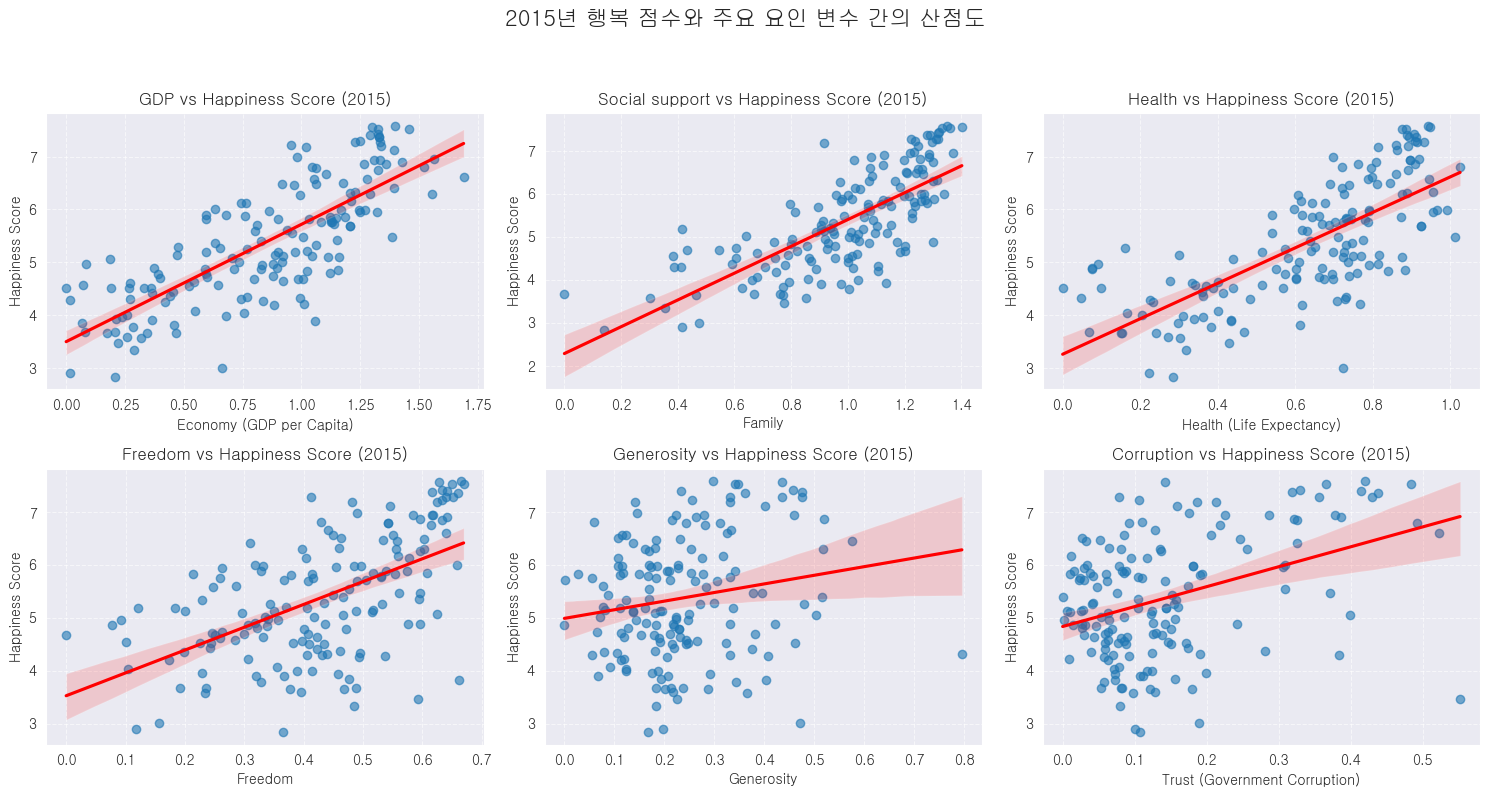


--- 2016년 데이터 산점도 그리는 중 ---


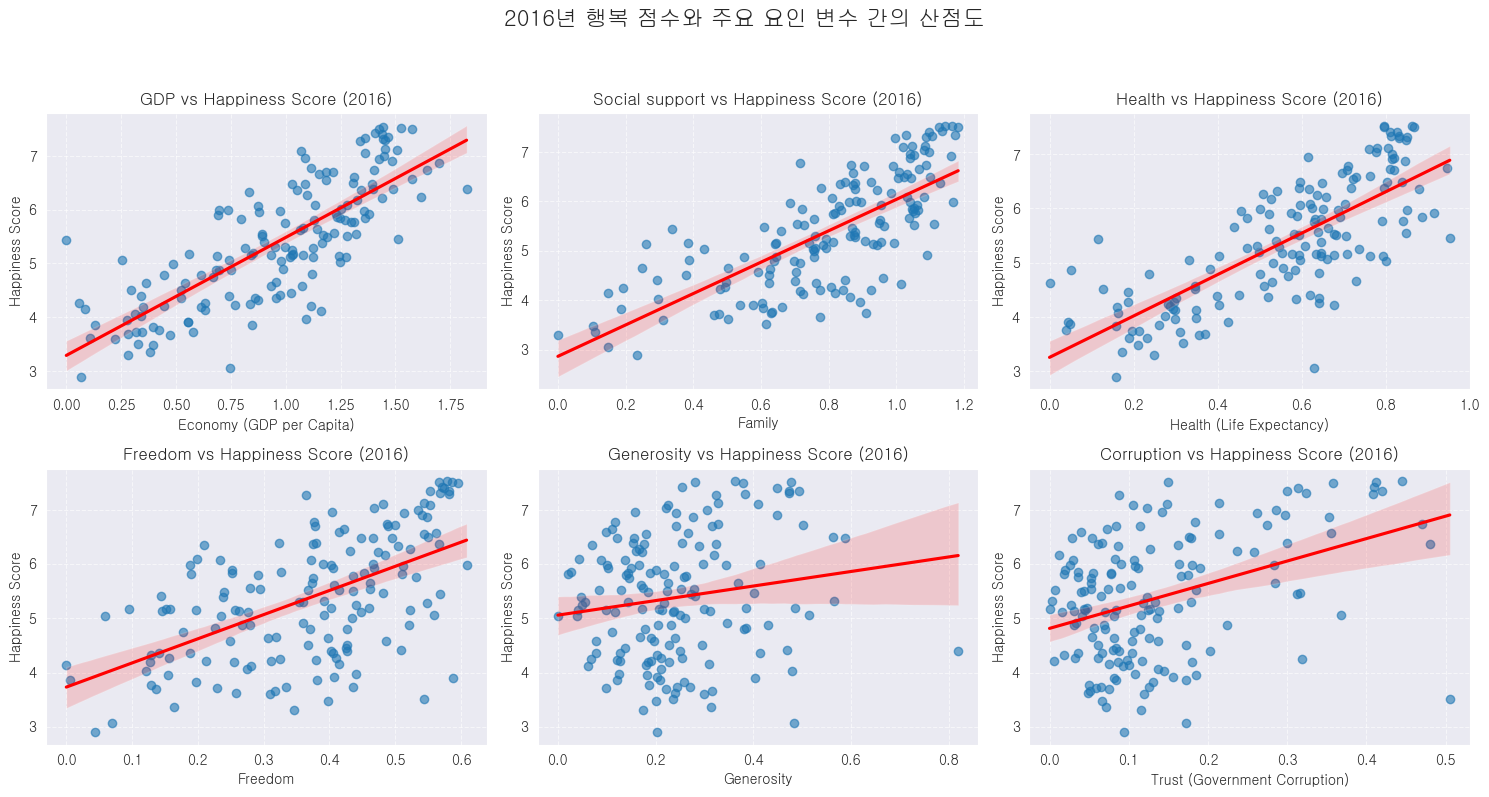


--- 2017년 데이터 산점도 그리는 중 ---


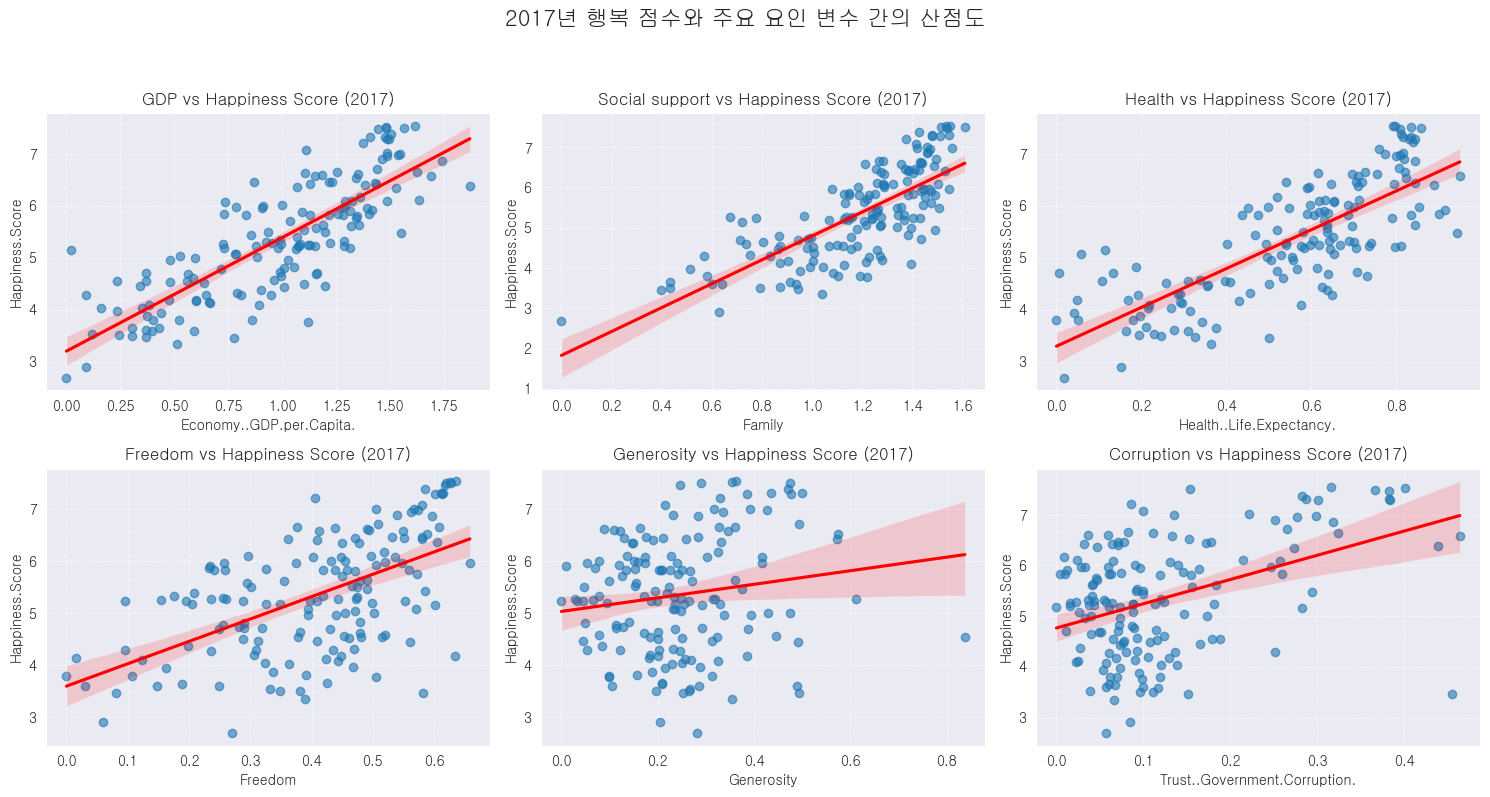


--- 2018년 데이터 산점도 그리는 중 ---


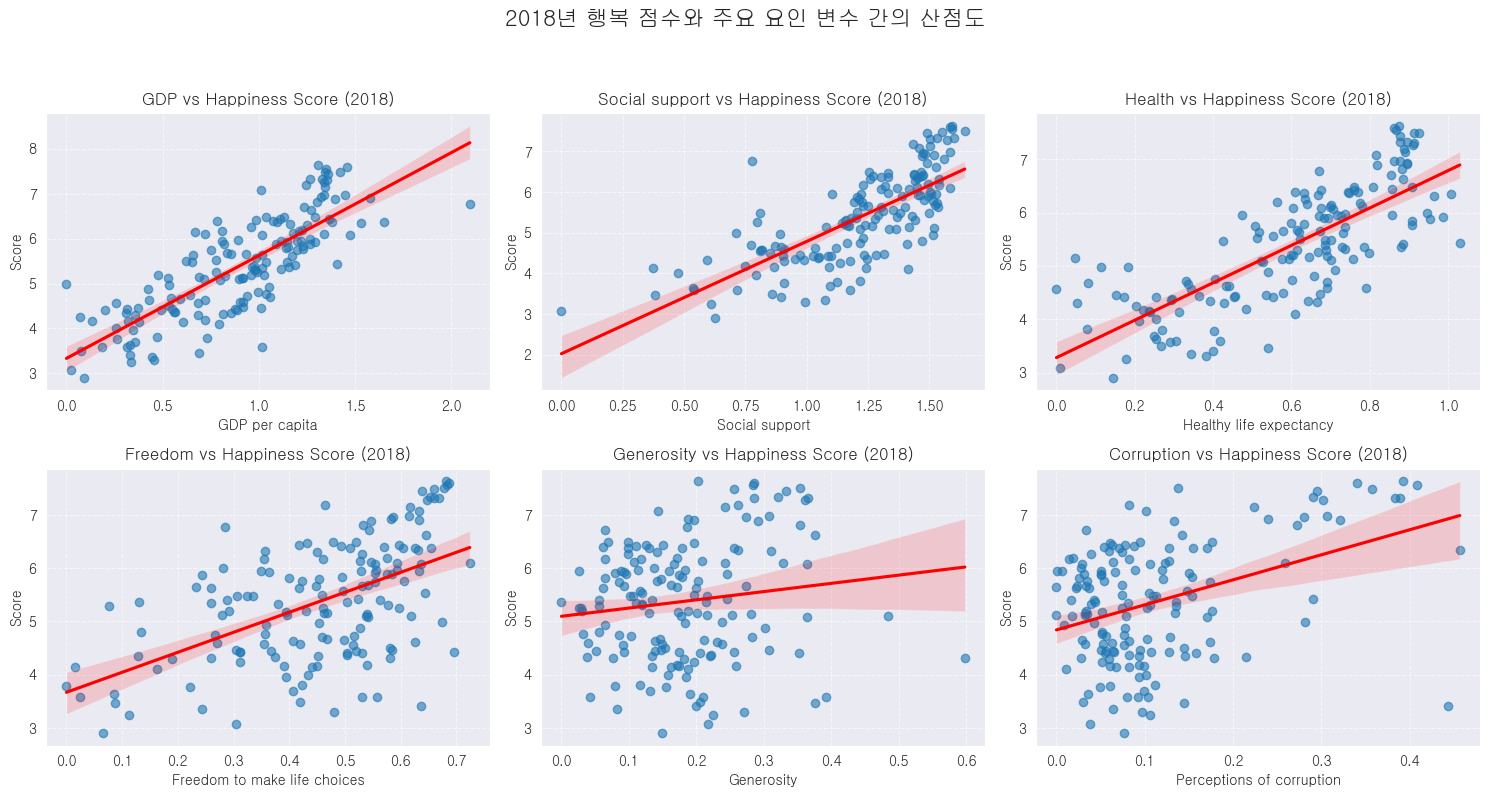


--- 2019년 데이터 산점도 그리는 중 ---


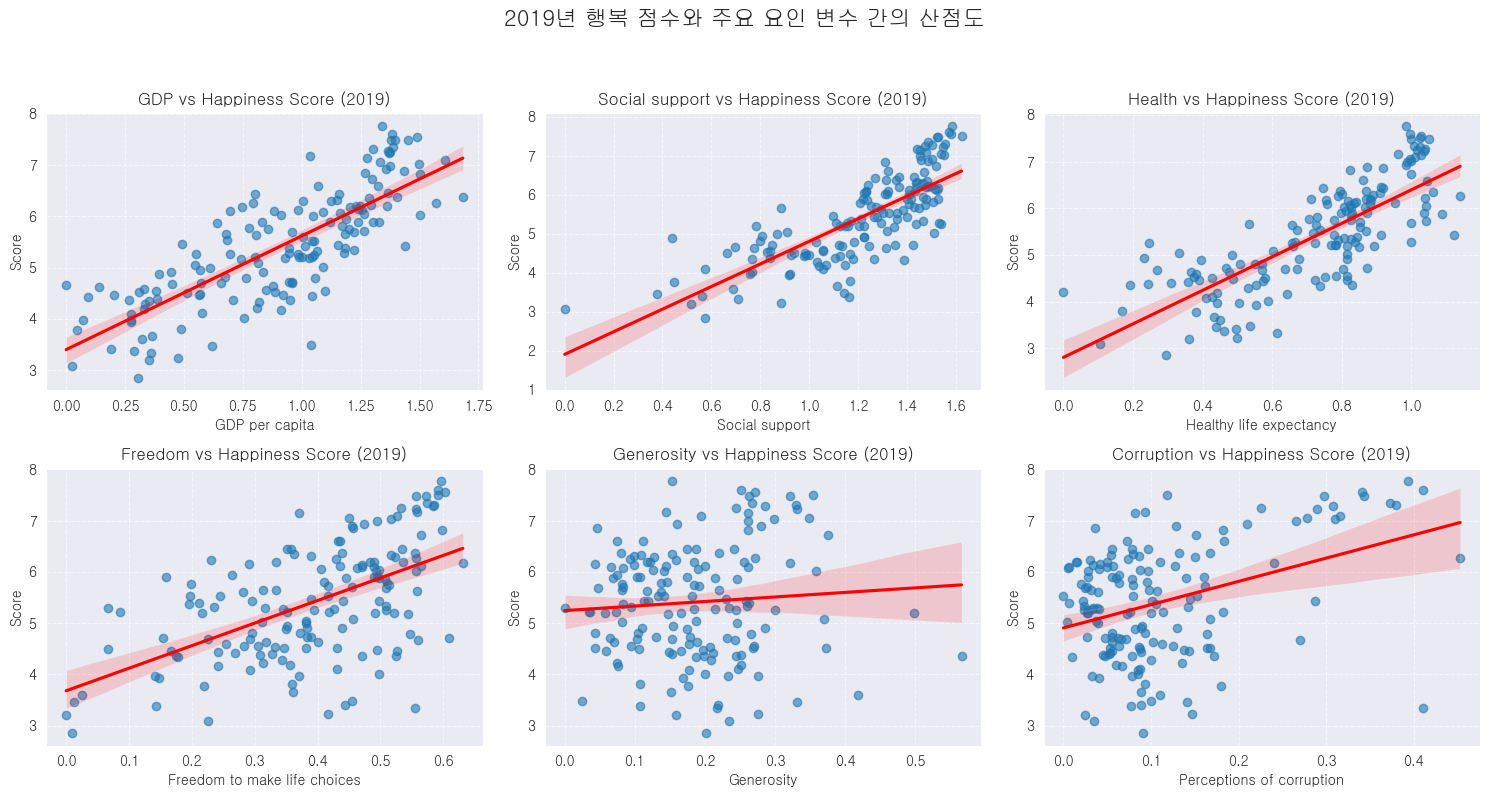


--- 모든 연도 산점도 그리기를 마쳤습니다. ---


In [13]:
# !!! 사용자 제공 dfs 딕셔너리를 사용합니다 !!!
# 예시로 비어있는 딕셔너리로 초기화하지만, 실제 코드 실행 전에
# 사용자 환경에서는 각 연도별 DataFrame이 로드되어 dfs에 할당되어 있어야 합니다.
dfs = {
    '2015': happiness_2015_df, # 실제 DataFrame 객체 할당 필요
    '2016': happiness_2016_df, # 실제 DataFrame 객체 할당 필요
    '2017': happiness_2017_df, # 실제 DataFrame 객체 할당 필요
    '2018': happiness_2018_df, # 실제 DataFrame 객체 할당 필요
    '2019': happiness_2019_df  # 실제 DataFrame 객체 할당 필요
}

# 분석할 요인 변수들의 '논리적인' 이름 리스트
feature_names_logical = [
    'GDP',
    'Social support',
    'Health',
    'Freedom',
    'Generosity',
    'Corruption'
]

# 연도별 실제 데이터프레임의 컬럼 이름 매핑
# !!! 중요: 이 매핑은 실제 데이터프레임의 컬럼 이름과 정확히 일치해야 합니다 !!!
# 소스 [7-11]를 참고하여 매핑을 구성했습니다.
variable_mapping = {
    'target': {
        '2015': 'Happiness Score',
        '2016': 'Happiness Score',
        '2017': 'Happiness.Score',
        '2018': 'Score',
        '2019': 'Score'
    },
    'features': {
        'GDP': {
            '2015': 'Economy (GDP per Capita)',
            '2016': 'Economy (GDP per Capita)',
            '2017': 'Economy..GDP.per.Capita.',
            '2018': 'GDP per capita',
            '2019': 'GDP per capita'
        },
        'Social support': {
            '2015': 'Family', # 2015-2017은 Family [7-9]
            '2016': 'Family',
            '2017': 'Family',
            '2018': 'Social support', # 2018-2019는 Social support [10, 11]
            '2019': 'Social support'
        },
        'Health': {
            '2015': 'Health (Life Expectancy)', # 2015-2017은 Health (Life Expectancy) [7-9]
            '2016': 'Health (Life Expectancy)',
            '2017': 'Health..Life.Expectancy.',
            '2018': 'Healthy life expectancy', # 2018-2019는 Healthy life expectancy [10, 11]
            '2019': 'Healthy life expectancy'
        },
        'Freedom': { # Freedom 컬럼은 비교적 일관적인 이름 사용 [7-11]
            '2015': 'Freedom',
            '2016': 'Freedom',
            '2017': 'Freedom',
            '2018': 'Freedom to make life choices', # 2018-2019는 이름이 다름 [10, 11]
            '2019': 'Freedom to make life choices'
        },
        'Generosity': { # Generosity 컬럼은 비교적 일관적인 이름 사용 [7-11]
            '2015': 'Generosity',
            '2016': 'Generosity',
            '2017': 'Generosity',
            '2018': 'Generosity',
            '2019': 'Generosity'
        },
        'Corruption': { # 부패 관련 컬럼 이름이 가장 다양함 [7-11]
            '2015': 'Trust (Government Corruption)',
            '2016': 'Trust (Government Corruption)',
            '2017': 'Trust..Government.Corruption.',
            '2018': 'Perceptions of corruption',
            '2019': 'Perceptions of corruption'
        }
    }
}

# 각 그림(Figure)에 몇 개의 서브플롯(Axes)을 그릴지 격자 크기 계산
n_features = len(feature_names_logical)
n_cols = 3 # 한 줄에 그릴 그래프 수 (3개가 적당히 보기 좋음)
# 필요한 행 수는 (총 특징 변수 개수 + 한 줄 그래프 수 - 1) // 한 줄 그래프 수
n_rows = (n_features + n_cols - 1) // n_cols

# dfs 딕셔너리의 연도별 DataFrame에 대해 반복
for year, df_year in dfs.items():
    print(f"\n--- {year}년 데이터 산점도 그리는 중 ---")

    # 해당 연도의 타겟 컬럼 이름 가져오기
    target_col_actual = variable_mapping['target'].get(year)
    if not target_col_actual or target_col_actual not in df_year.columns:
        print(f"경고: {year}년 데이터에 타겟 컬럼 '{target_col_actual}'이(가) 없거나 매핑 오류입니다. 이 연도는 건너뜁니다.")
        continue

    # 해당 연도에 실제로 그릴 수 있는 요인 변수 매핑 및 확인
    current_year_features_to_plot = {}
    for logical_name in feature_names_logical:
        actual_name = variable_mapping['features'][logical_name].get(year)
        if actual_name and actual_name in df_year.columns:
            current_year_features_to_plot[logical_name] = actual_name
        else:
             print(f"정보: {year}년 데이터에 논리적 이름 '{logical_name}'에 해당하는 실제 컬럼 '{actual_name}'이(가) 없습니다. 이 변수는 제외합니다.")


    # 해당 연도에 그릴 요인 변수가 없으면 건너뛰기
    if not current_year_features_to_plot:
        print(f"경고: {year}년 데이터에 지정된 요인 변수 컬럼이 하나도 없습니다. 이 연도는 건너뜁니다.")
        continue

    # 현재 연도에 그릴 그래프 수에 맞게 격자 크기 재조정
    n_features_present = len(current_year_features_to_plot)
    n_rows_present = (n_features_present + n_cols - 1) // n_cols


    # 새로운 그림 (Figure) 생성 및 사이즈 설정
    # 각 서브플롯의 적절한 크기를 고려하여 전체 그림 크기 설정
    plt.figure(figsize=(n_cols * 5, n_rows_present * 4)) # 예시: 각 서브플롯 5x4 인치 크기

    # 현재 연도에 대해 존재하는 각 요인 변수에 대해 산점도 그리기
    # enumerate는 (인덱스, 값) 형태로 순회, current_year_features_to_plot.items()는 (키, 값) 형태로 순회 -> (논리적 이름, 실제 이름)
    for i, (logical_name, actual_col) in enumerate(current_year_features_to_plot.items()):
        # 서브플롯 위치 지정: (전체 행 수, 전체 열 수, 현재 서브플롯 순서 (1부터 시작))
        plt.subplot(n_rows_present, n_cols, i + 1)

        # 산점도 그리기 (seaborn의 regplot 사용)
        # data=df_year: 현재 연도의 데이터 사용
        # x=actual_col: x축 변수 (현재 요인 변수의 실제 컬럼 이름)
        # y=target_col_actual: y축 변수 (행복 점수의 실제 컬럼 이름)
        # scatter_kws={'alpha':0.6}: 점의 투명도 설정 (겹치는 부분 확인 용이)
        # line_kws={"color": "red"}: 회귀선 색상 설정
        sns.regplot(data=df_year, x=actual_col, y=target_col_actual, scatter_kws={'alpha':0.6}, line_kws={"color": "red"})

        # 각 서브플롯 제목 및 레이블 설정
        plt.title(f'{logical_name} vs Happiness Score ({year})', fontsize=12) # 제목은 논리적 이름으로 표시
        plt.xlabel(actual_col, fontsize=10) # 축 레이블은 실제 컬럼 이름으로 표시
        plt.ylabel(target_col_actual, fontsize=10)
        plt.grid(True, linestyle='--', alpha=0.6) # 가이드라인 추가

    # 전체 그림 제목 설정 (현재 연도 포함)
    # y 인자 조정으로 제목이 서브플롯과 겹치지 않게 함
    plt.suptitle(f'{year}년 행복 점수와 주요 요인 변수 간의 산점도', fontsize=16, y=1.02)

    # 그래프들이 겹치지 않도록 레이아웃 조정
    # rect 인자 조정으로 suptitle을 위한 상단 공간 확보
    plt.tight_layout(rect=[0, 0.03, 1, 0.98])

    # 현재 연도의 그래프 보여주기
    plt.show()

print("\n--- 모든 연도 산점도 그리기를 마쳤습니다. ---")

## 7. 상관관계 및 교차분석


--- Analyzing Correlations for 2015 ---


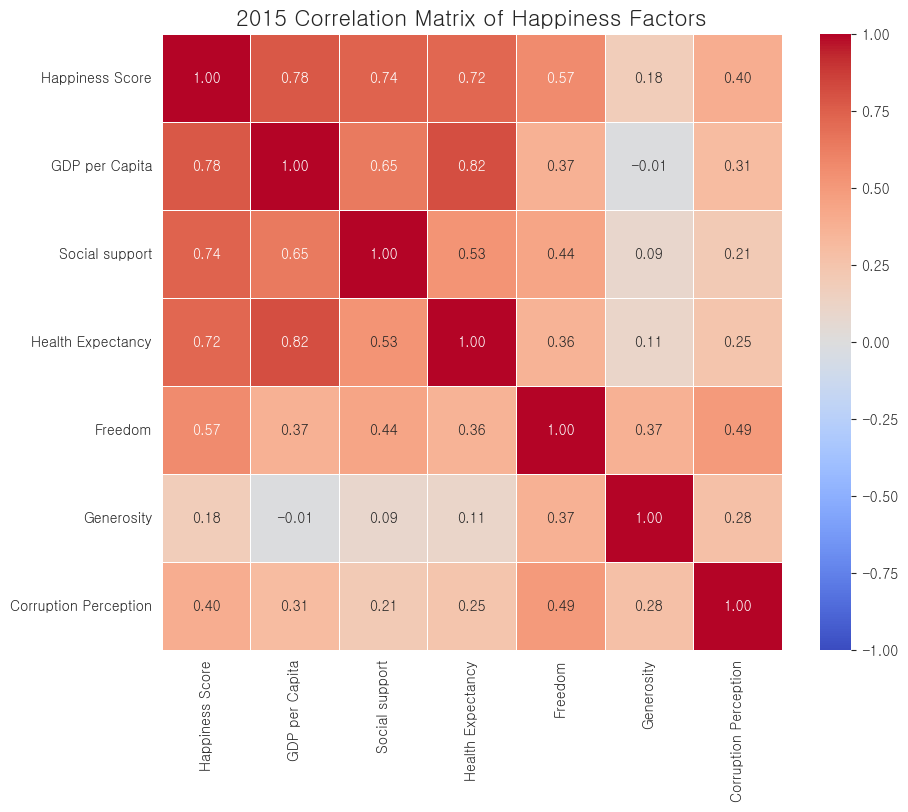


Correlation with Happiness Score (2015):
Happiness Score          1.000000
GDP per Capita           0.780966
Social support           0.740605
Health Expectancy        0.724200
Freedom                  0.568211
Corruption Perception    0.395199
Generosity               0.180319
Name: Happiness Score, dtype: float64

--- Analyzing Correlations for 2016 ---


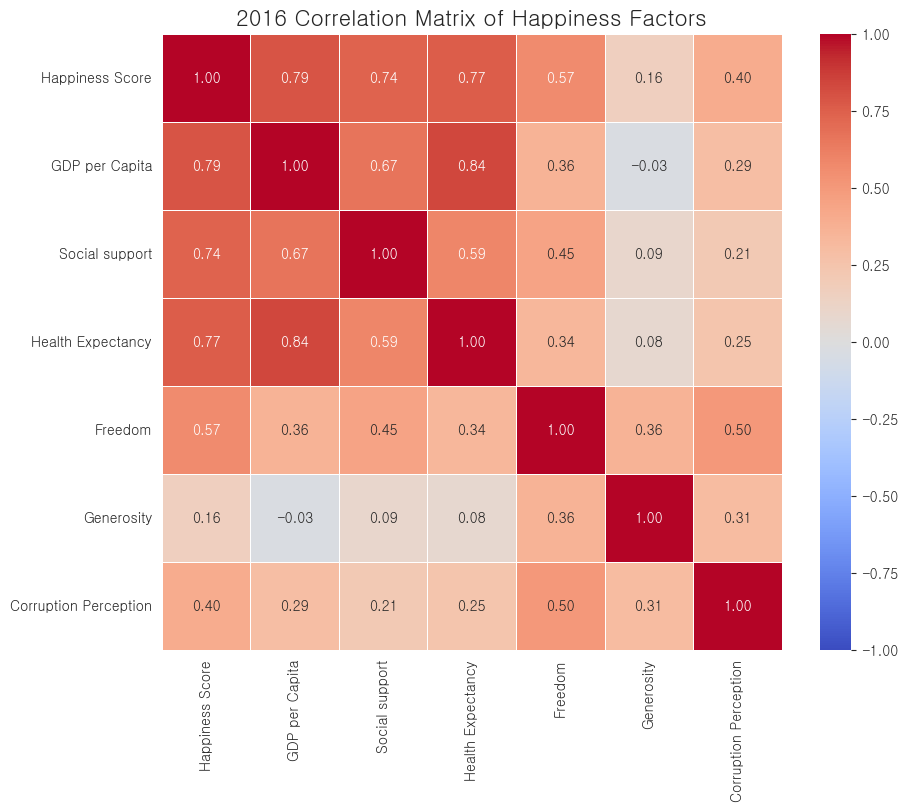


Correlation with Happiness Score (2016):
Happiness Score          1.000000
GDP per Capita           0.790322
Health Expectancy        0.765384
Social support           0.739252
Freedom                  0.566827
Corruption Perception    0.402032
Generosity               0.156848
Name: Happiness Score, dtype: float64

--- Analyzing Correlations for 2017 ---


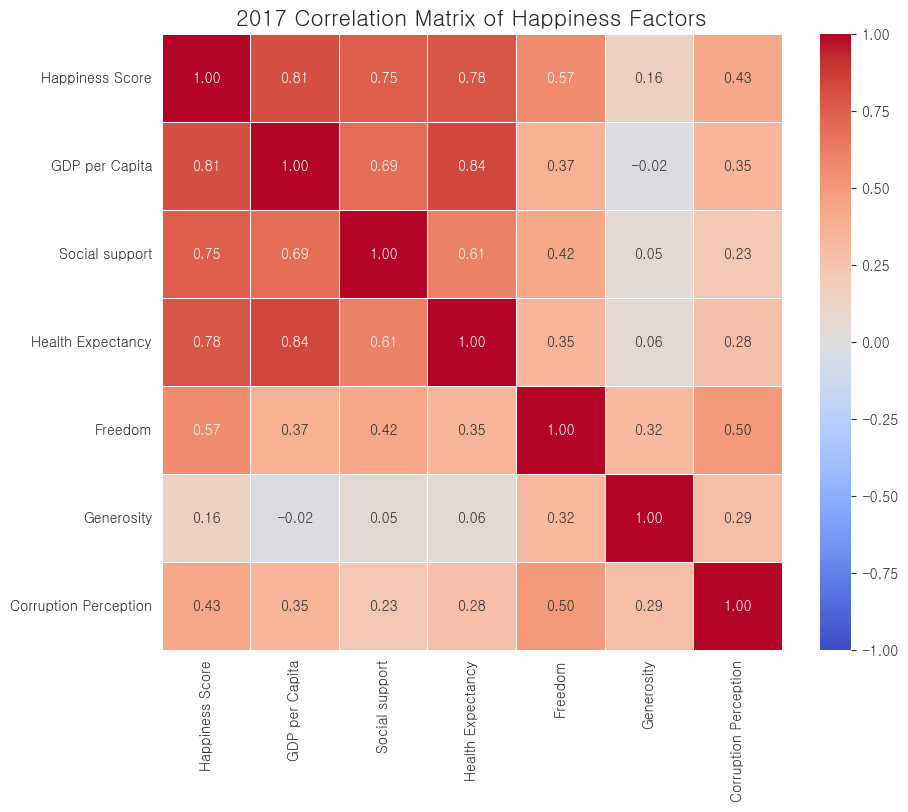


Correlation with Happiness Score (2017):
Happiness Score          1.000000
GDP per Capita           0.812469
Health Expectancy        0.781951
Social support           0.752737
Freedom                  0.570137
Corruption Perception    0.429080
Generosity               0.155256
Name: Happiness Score, dtype: float64

--- Analyzing Correlations for 2018 ---


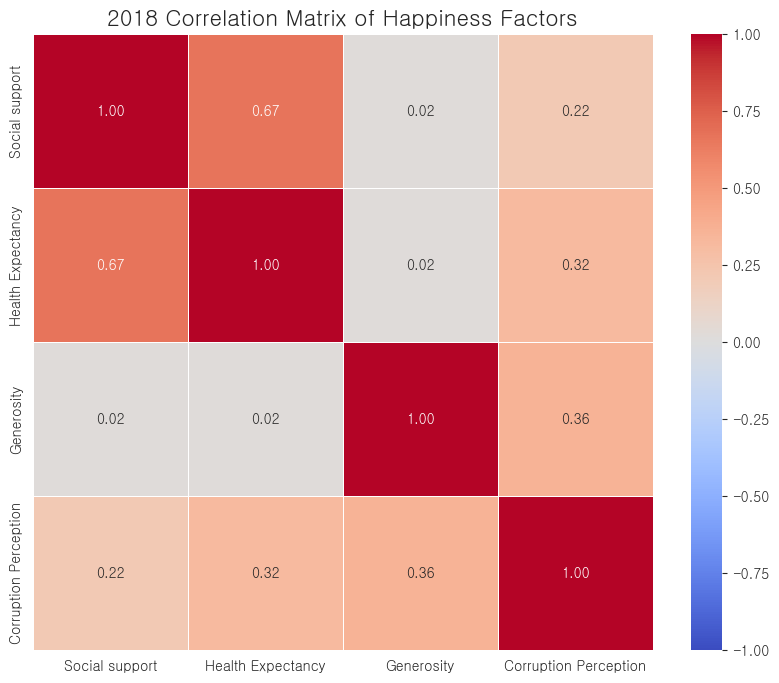


--- Analyzing Correlations for 2019 ---


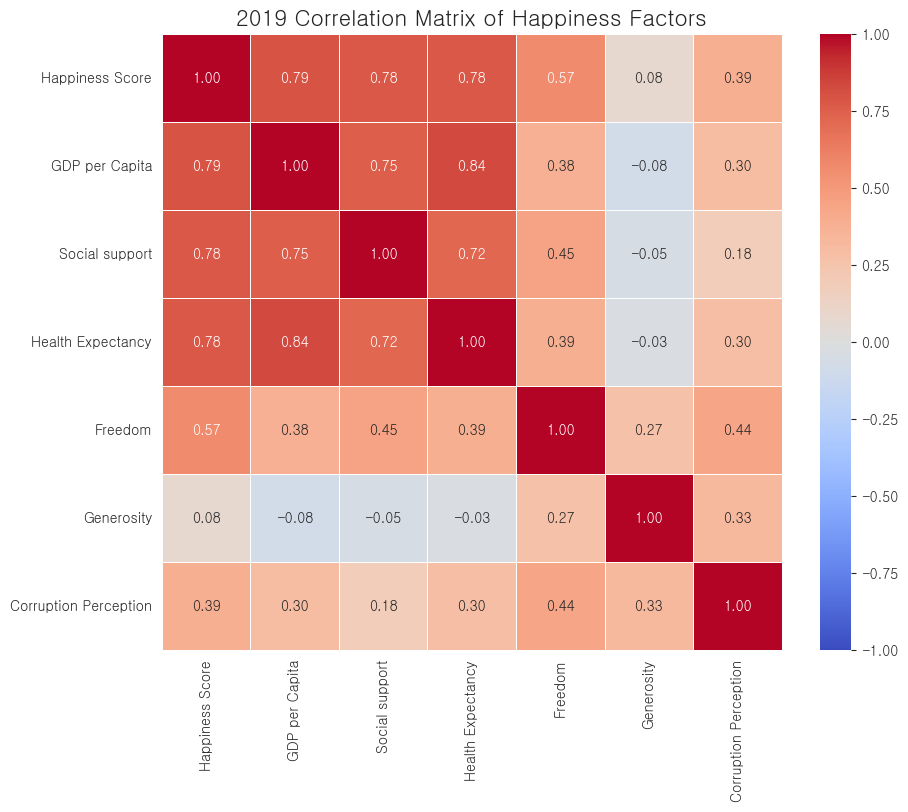


Correlation with Happiness Score (2019):
Happiness Score          1.000000
GDP per Capita           0.793883
Health Expectancy        0.779883
Social support           0.777058
Freedom                  0.566742
Corruption Perception    0.385613
Generosity               0.075824
Name: Happiness Score, dtype: float64


In [14]:
# 논리적 변수 이름과 연도별 실제 컬럼 이름 매핑 [24-26]
# 이전 단계에서 사용했던 매핑을 활용
variable_mapping = {
    'Happiness Score': {
        '2015': 'Happiness Score', '2016': 'Happiness Score',
        '2017': 'Happiness.Score', '2018': 'Happiness Score', '2019': 'Score'
    },
    'GDP per Capita': {
        '2015': 'Economy (GDP per Capita)', '2016': 'Economy (GDP per Capita)',
        '2017': 'Economy..GDP.per.Capita.', '2018': 'GDP per Capita', '2019': 'GDP per capita'
    },
    'Social support': { # 2015-2017은 Family, 2018-2019는 Social support [24]
        '2015': 'Family', '2016': 'Family', '2017': 'Family',
        '2018': 'Social support', '2019': 'Social support'
    },
    'Health Expectancy': { # 2015-2017은 Health (Life Expectancy), 2018-2019는 Healthy life expectancy [24]
        '2015': 'Health (Life Expectancy)', '2016': 'Health (Life Expectancy)',
        '2017': 'Health..Life.Expectancy.', '2018': 'Healthy life expectancy', '2019': 'Healthy life expectancy'
    },
    'Freedom': {
        '2015': 'Freedom', '2016': 'Freedom', '2017': 'Freedom',
        '2018': 'Freedom', '2019': 'Freedom to make life choices' # 2019년 변수 이름 약간 다름
    },
    'Generosity': {
        '2015': 'Generosity', '2016': 'Generosity', '2017': 'Generosity',
        '2018': 'Generosity', '2019': 'Generosity'
    },
    'Corruption Perception': { # 2015-2017은 Trust (Government Corruption), 2018-2019는 Perceptions of corruption [24]
        '2015': 'Trust (Government Corruption)', '2016': 'Trust (Government Corruption)',
        '2017': 'Trust..Government.Corruption.', '2018': 'Perceptions of corruption', '2019': 'Perceptions of corruption'
    }
}

# 분석에 사용할 논리적 변수 이름 목록
logical_features = [
    'Happiness Score', 'GDP per Capita', 'Social support',
    'Health Expectancy', 'Freedom', 'Generosity', 'Corruption Perception'
]

# 연도별로 상관 행렬 히트맵 그리기
for year, df_year in dfs.items():
    print(f"\n--- Analyzing Correlations for {year} ---")

    # 해당 연도에 존재하는 컬럼만 추출하여 사용할 컬럼 목록 생성
    current_year_cols = []
    current_year_logical_names = []
    for logical_name in logical_features:
        if year in variable_mapping[logical_name] and variable_mapping[logical_name][year] in df_year.columns:
            current_year_cols.append(variable_mapping[logical_name][year])
            current_year_logical_names.append(logical_name)
        else:
            # print(f"Warning: '{logical_name}' not found in {year} data as '{variable_mapping[logical_name][year] if year in variable_mapping[logical_name] else 'N/A'}'. Skipping.")
            pass # 경고는 너무 많으니 생략

    # 선택된 컬럼들로 데이터프레임 서브셋 생성
    df_subset = df_year[current_year_cols]

    # 상관 행렬 계산
    correlation_matrix = df_subset.corr()

    # 컬럼 이름을 논리적인 이름으로 변경하여 히트맵 가독성 높이기
    # 매핑된 컬럼 이름의 순서와 동일하게 논리적인 이름 순서 정렬
    col_name_map = {variable_mapping[logical_name][year]: logical_name for logical_name in current_year_logical_names}
    correlation_matrix = correlation_matrix.rename(index=col_name_map, columns=col_name_map)


    # 상관 행렬 히트맵 시각화
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix,
                annot=True,     # 상관 계수 값 표시
                cmap='coolwarm', # 색상 팔레트 (positive는 따뜻, negative는 차가운 색)
                fmt=".2f",      # 소수점 둘째 자리까지 표시
                linewidths=.5,  # 셀 간 구분선
                vmin=-1, vmax=1) # 색상 범위를 -1부터 1까지 고정하여 연도별 비교 용이
    plt.title(f'{year} Correlation Matrix of Happiness Factors', fontsize=16)
    plt.show()

    # 추가 분석: 행복 점수와의 상관관계만 따로 확인 (가장 중요!)
    if 'Happiness Score' in correlation_matrix.columns:
        print(f"\nCorrelation with Happiness Score ({year}):")
        # 행복 점수 컬럼과의 상관관계만 추출하여 정렬
        happiness_corr = correlation_matrix['Happiness Score'].sort_values(ascending=False)
        print(happiness_corr)
    else:
         # 2019년의 경우 'Score'라는 이름 사용 [18]
        if 'Score' in correlation_matrix.columns:
             print(f"\nCorrelation with Score ({year}):")
             happiness_corr = correlation_matrix['Score'].sort_values(ascending=False)
             print(happiness_corr)


# 모든 연도 데이터 통합하여 상관관계 분석하는 것도 고려해볼 수 있음 (선택 사항)
# all_years_df = pd.concat(dfs.values(), ignore_index=True)
# # 이 경우, 연도별로 이름이 다른 컬럼들은 통일하는 전처리가 필요함 (예: Family와 Social support를 Social_Support로)
# # 위 매핑 정보를 활용하여 컬럼 이름을 통일한 후 corr() 및 heatmap 실행 가능

## 8. 데이터 전처리

In [15]:
variable_mapping = {
    # Target variable
    'Happiness Score': 'Happiness Score', # 2015, 2016 [2, 3]
    'Happiness.Score': 'Happiness Score', # 2017 [4]
    'Score': 'Happiness Score',         # 2018, 2019 [5, 6]

    # Country/Region
    'Country': 'Country',                 # 2015, 2016 [2, 3]
    'Country or region': 'Country',       # 2018, 2019 [5, 6]
    # 'Region' column seems to be consistent in the structure [1] but might be missing in some raw files [4]
    # Assuming 'Region' exists in the DataFrames in dfs based on [1].

    # Rank
    'Happiness Rank': 'Happiness Rank',   # 2015, 2016 [2, 3]
    'Happiness.Rank': 'Happiness Rank',   # 2017 [4]
    'Overall rank': 'Happiness Rank',     # 2018, 2019 [5, 6]

    # Factor variables - mapping to a common name
    'Economy (GDP per Capita)': 'GDP per Capita', # 2015 [2]
    'Economy..GDP.per.Capita.': 'GDP per Capita', # 2017 [4]
    'GDP per capita': 'GDP per Capita',         # 2016, 2018, 2019 [3, 5, 6]

    'Family': 'Social Support',           # 2015 [2]
    'Family ': 'Social Support',          # 2017 [4] (Note the space)
    'Social support': 'Social Support',   # 2016, 2018, 2019 [3, 5, 6]

    'Health (Life Expectancy)': 'Healthy Life Expectancy', # 2015 [2]
    'Health..Life.Expectancy.': 'Healthy Life Expectancy', # 2017 [4]
    'Healthy life expectancy': 'Healthy Life Expectancy', # 2016, 2018, 2019 [3, 5, 6]

    'Freedom': 'Freedom',                 # Consistent across years [2-6]

    'Generosity': 'Generosity',           # Consistent across years [2-6]

    'Trust (Government Corruption)': 'Perceptions of Corruption', # 2015, 2016 [2, 3]
    'Trust..Government.Corruption.': 'Perceptions of Corruption', # 2017 [4]
    'Perceptions of corruption': 'Perceptions of Corruption', # 2018, 2019 [5, 6]

    # Dystopia Residual (Note: Missing in 2018/2019 excerpts but present in 2015-2017)
    'Dystopia Residual': 'Dystopia Residual', # 2015, 2016 [2, 3]
    'Dystopia.Residual': 'Dystopia Residual', # 2017 [4]

    # Other potential columns to drop or handle differently (like standard error, confidence intervals)
    # Standard Error, Lower/Upper Confidence Interval, Whisker high/low are less critical for factor analysis
    # We will select only the columns we want in the final dataframe.
}

# List of standard column names to keep in the final combined dataset
final_columns = [
    'Country',
    'Region',       # Assuming Region is available and consistent
    'Year',         # Newly added column
    'Happiness Rank',
    'Happiness Score',
    'GDP per Capita',
    'Social Support',
    'Healthy Life Expectancy',
    'Freedom',
    'Generosity',
    'Perceptions of Corruption',
    'Dystopia Residual' # Keep for years where it exists, will be NaN for others
]

# List to hold processed dataframes before concatenation
processed_dfs = []

# Iterate through each year's dataframe
for year, df in dfs.items():
    print(f"Processing data for year: {year}")

    # Add 'Year' column
    df['Year'] = int(year) # Add the year as an integer [대화 내용]

    # Rename columns using the mapping
    # Create a dictionary of existing columns that need renaming based on the mapping
    columns_to_rename = {col: variable_mapping[col] for col in df.columns if col in variable_mapping}
    df_renamed = df.rename(columns=columns_to_rename)

    # Select only the desired columns for the final dataset
    # Need to handle cases where a column might not exist in a specific year (e.g., Dystopia Residual in later years)
    current_year_final_columns = [col for col in final_columns if col in df_renamed.columns]
    df_processed = df_renamed[current_year_final_columns]

    # Reindex columns to the standard order in final_columns, filling missing ones with NaN
    df_processed = df_processed.reindex(columns=final_columns)

    # Append the processed dataframe to the list
    processed_dfs.append(df_processed)
    print(f"Processed {year} data. Shape: {df_processed.shape}")
    # print(f"Columns: {df_processed.columns.tolist()}") # Optional: print columns for verification

# Concatenate all processed dataframes into a single dataframe
# Using ignore_index=True resets the index for the new combined dataframe
combined_happiness_df = pd.concat(processed_dfs, ignore_index=True)

print("\n--- Data Combination Complete ---")
print(f"Shape of combined dataframe: {combined_happiness_df.shape}")
print("\nInfo of combined dataframe:")
combined_happiness_df.info()

print("\nFirst 5 rows of combined dataframe:")
print(combined_happiness_df.head())

print("\nLast 5 rows of combined dataframe:")
print(combined_happiness_df.tail())

# Quick check on Years included
print("\nYears included in combined dataframe:")
print(combined_happiness_df['Year'].unique())

# Verify the UAE Trust N/A for 2018 remains in the combined data
uae_2018_trust = combined_happiness_df[(combined_happiness_df['Country'] == 'United Arab Emirates') & (combined_happiness_df['Year'] == 2018)]['Perceptions of Corruption']
print(f"\nUAE Trust/Perceptions of Corruption value for 2018 (should be N/A or NaN): {uae_2018_trust.values}")
# Note: Pandas often represents N/A from CSV as NaN (Not a Number)

# Add a comment about the discovered N/A for future discussion
# This is not code, but a conceptual note based on our agreement
# "UAE 2018 Trust/Perceptions of Corruption: NaN (결측치 발견, 향후 분석 시 고려/논의 필요)" [대화 내용]

Processing data for year: 2015
Processed 2015 data. Shape: (158, 12)
Processing data for year: 2016
Processed 2016 data. Shape: (157, 12)
Processing data for year: 2017
Processed 2017 data. Shape: (155, 12)
Processing data for year: 2018
Processed 2018 data. Shape: (156, 12)
Processing data for year: 2019
Processed 2019 data. Shape: (156, 12)

--- Data Combination Complete ---
Shape of combined dataframe: (782, 12)

Info of combined dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Country                    782 non-null    object 
 1   Region                     315 non-null    object 
 2   Year                       782 non-null    int64  
 3   Happiness Rank             782 non-null    int64  
 4   Happiness Score            782 non-null    float64
 5   GDP per Capita             782 non-null    float64

In [16]:
print("--- EDA 8단계: 데이터 전처리 시작 (결측치 처리 및 컬럼 삭제) ---")

# 전처리 전 결측치 상태 확인 (소스 [3]과 같은 상태를 예상)
print("\n--- 전처리 전 컬럼별 결측치 개수 ---")
print(combined_happiness_df.isnull().sum())
print("-" * 30)

# 1. 'Region' 컬럼 삭제
# 사용자님의 요청에 따라 Region 컬럼을 삭제합니다. [User instruction]
print("1. 'Region' 컬럼을 삭제합니다.")
# axis=1은 컬럼을 삭제하겠다는 의미입니다.
df_cleaned = combined_happiness_df.drop(columns=['Region'])

# 2. 'Dystopia Residual' 컬럼 삭제
# 사용자님의 요청에 따라 Dystopia Residual 컬럼을 삭제합니다. [User instruction]
print("2. 'Dystopia Residual' 컬럼을 삭제합니다.")
df_cleaned = df_cleaned.drop(columns=['Dystopia Residual'])

# 3. 'Freedom' 컬럼 결측치를 평균값으로 대체 (Imputation)
# df_cleaned에서 'Freedom' 컬럼의 평균을 계산합니다.
mean_freedom = df_cleaned['Freedom'].mean()
print(f"3. 'Freedom' 컬럼의 결측치를 평균값 ({mean_freedom:.4f})으로 대체합니다.")
# fillna() 함수를 사용하여 결측치(NaN)를 지정한 값(평균)으로 채웁니다.
df_cleaned['Freedom'] = df_cleaned['Freedom'].fillna(mean_freedom)

# 4. 'Perceptions of Corruption' 컬럼 결측치를 평균값으로 대체 (Imputation)
# df_cleaned에서 'Perceptions of Corruption' 컬럼의 평균을 계산합니다.
mean_corruption = df_cleaned['Perceptions of Corruption'].mean()
print(f"4. 'Perceptions of Corruption' 컬럼의 결측치를 평균값 ({mean_corruption:.4f})으로 대체합니다.")
# fillna() 함수를 사용하여 결측치(NaN)를 지정한 값(평균)으로 채웁니다.
df_cleaned['Perceptions of Corruption'] = df_cleaned['Perceptions of Corruption'].fillna(mean_corruption)

print("--- EDA 8단계: 데이터 전처리 완료 ---")

# 전처리 후 데이터프레임의 정보 및 결측치 다시 확인
print("\n--- 전처리 후 데이터프레임 정보 ---")
df_cleaned.info() # [6] info()를 통해 컬럼 삭제 및 non-null 개수 확인

print("\n--- 전처리 후 컬럼별 결측치 개수 확인 ---")
print(df_cleaned.isnull().sum()) # [6] isnull().sum()을 통해 결측치 제거 확인
print("-" * 30)


# 이제 df_cleaned 데이터프레임이 전처리된 최종 데이터입니다.

--- EDA 8단계: 데이터 전처리 시작 (결측치 처리 및 컬럼 삭제) ---

--- 전처리 전 컬럼별 결측치 개수 ---
Country                        0
Region                       467
Year                           0
Happiness Rank                 0
Happiness Score                0
GDP per Capita                 0
Social Support                 0
Healthy Life Expectancy        0
Freedom                      312
Generosity                     0
Perceptions of Corruption      1
Dystopia Residual            312
dtype: int64
------------------------------
1. 'Region' 컬럼을 삭제합니다.
2. 'Dystopia Residual' 컬럼을 삭제합니다.
3. 'Freedom' 컬럼의 결측치를 평균값 (0.4028)으로 대체합니다.
4. 'Perceptions of Corruption' 컬럼의 결측치를 평균값 (0.1254)으로 대체합니다.
--- EDA 8단계: 데이터 전처리 완료 ---

--- 전처리 후 데이터프레임 정보 ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Country                    782 non-null    object 


### 8-3. 데이터 요약 및 기술 통계

In [17]:
print("--- EDA 3단계: 데이터 요약 및 기술 통계 시작 ---")

# 1. 수치형 변수의 기술 통계 확인
# df_cleaned 데이터프레임의 수치형 컬럼들에 대한 기술 통계를 계산합니다.
# 기본적으로 describe()는 수치형 컬럼에 대해 count, mean, std, min, 25%, 50%(median), 75%, max 값을 보여줍니다. [7]
print("\n--- 수치형 변수 기술 통계 ---")
print(df_cleaned.describe())
print("-" * 30)

# 2. 범주형 변수 (또는 고유값 확인이 필요한 변수)의 빈도 확인
# 'Country' 컬럼의 고유값 개수와 상위 몇 개의 국가 빈도를 확인합니다.
print("\n--- 'Country' 컬럼 고유값 개수 및 빈도 확인 ---")
print(f"고유 국가 개수: {df_cleaned['Country'].nunique()}") # 고유한 국가의 총 개수
print("\n상위 10개 국가의 데이터 빈도:")
print(df_cleaned['Country'].value_counts().head(10)) # 데이터에 많이 등장하는 상위 10개 국가 (연도별 데이터 수 확인)
print("-" * 30)

# 'Year' 컬럼의 빈도 확인 (각 연도 데이터가 얼마나 있는지 확인)
print("\n--- 'Year' 컬럼 빈도 확인 ---")
print(df_cleaned['Year'].value_counts()) # 각 연도별 데이터 개수 [7]
print("-" * 30)

print("--- EDA 3단계: 데이터 요약 및 기술 통계 완료 ---")

--- EDA 3단계: 데이터 요약 및 기술 통계 시작 ---

--- 수치형 변수 기술 통계 ---
              Year  Happiness Rank  Happiness Score  GDP per Capita  \
count   782.000000      782.000000       782.000000      782.000000   
mean   2016.993606       78.698210         5.379018        0.916047   
std       1.417364       45.182384         1.127456        0.407340   
min    2015.000000        1.000000         2.693000        0.000000   
25%    2016.000000       40.000000         4.509750        0.606500   
50%    2017.000000       79.000000         5.322000        0.982205   
75%    2018.000000      118.000000         6.189500        1.236187   
max    2019.000000      158.000000         7.769000        2.096000   

       Social Support  Healthy Life Expectancy     Freedom  Generosity  \
count      782.000000               782.000000  782.000000  782.000000   
mean         1.078392                 0.612416    0.402828    0.218576   
std          0.329548                 0.248309    0.116515    0.122321   
min    

### 8-4. 결측치 및 이상치 탐색

--- EDA 4단계: 결측치 및 이상치 탐색 시작 ---

--- df_cleaned 컬럼별 결측치 개수 확인 ---
Country                      0
Year                         0
Happiness Rank               0
Happiness Score              0
GDP per Capita               0
Social Support               0
Healthy Life Expectancy      0
Freedom                      0
Generosity                   0
Perceptions of Corruption    0
dtype: int64
------------------------------

--- 수치형 변수 이상치 탐색 (Box Plot) ---


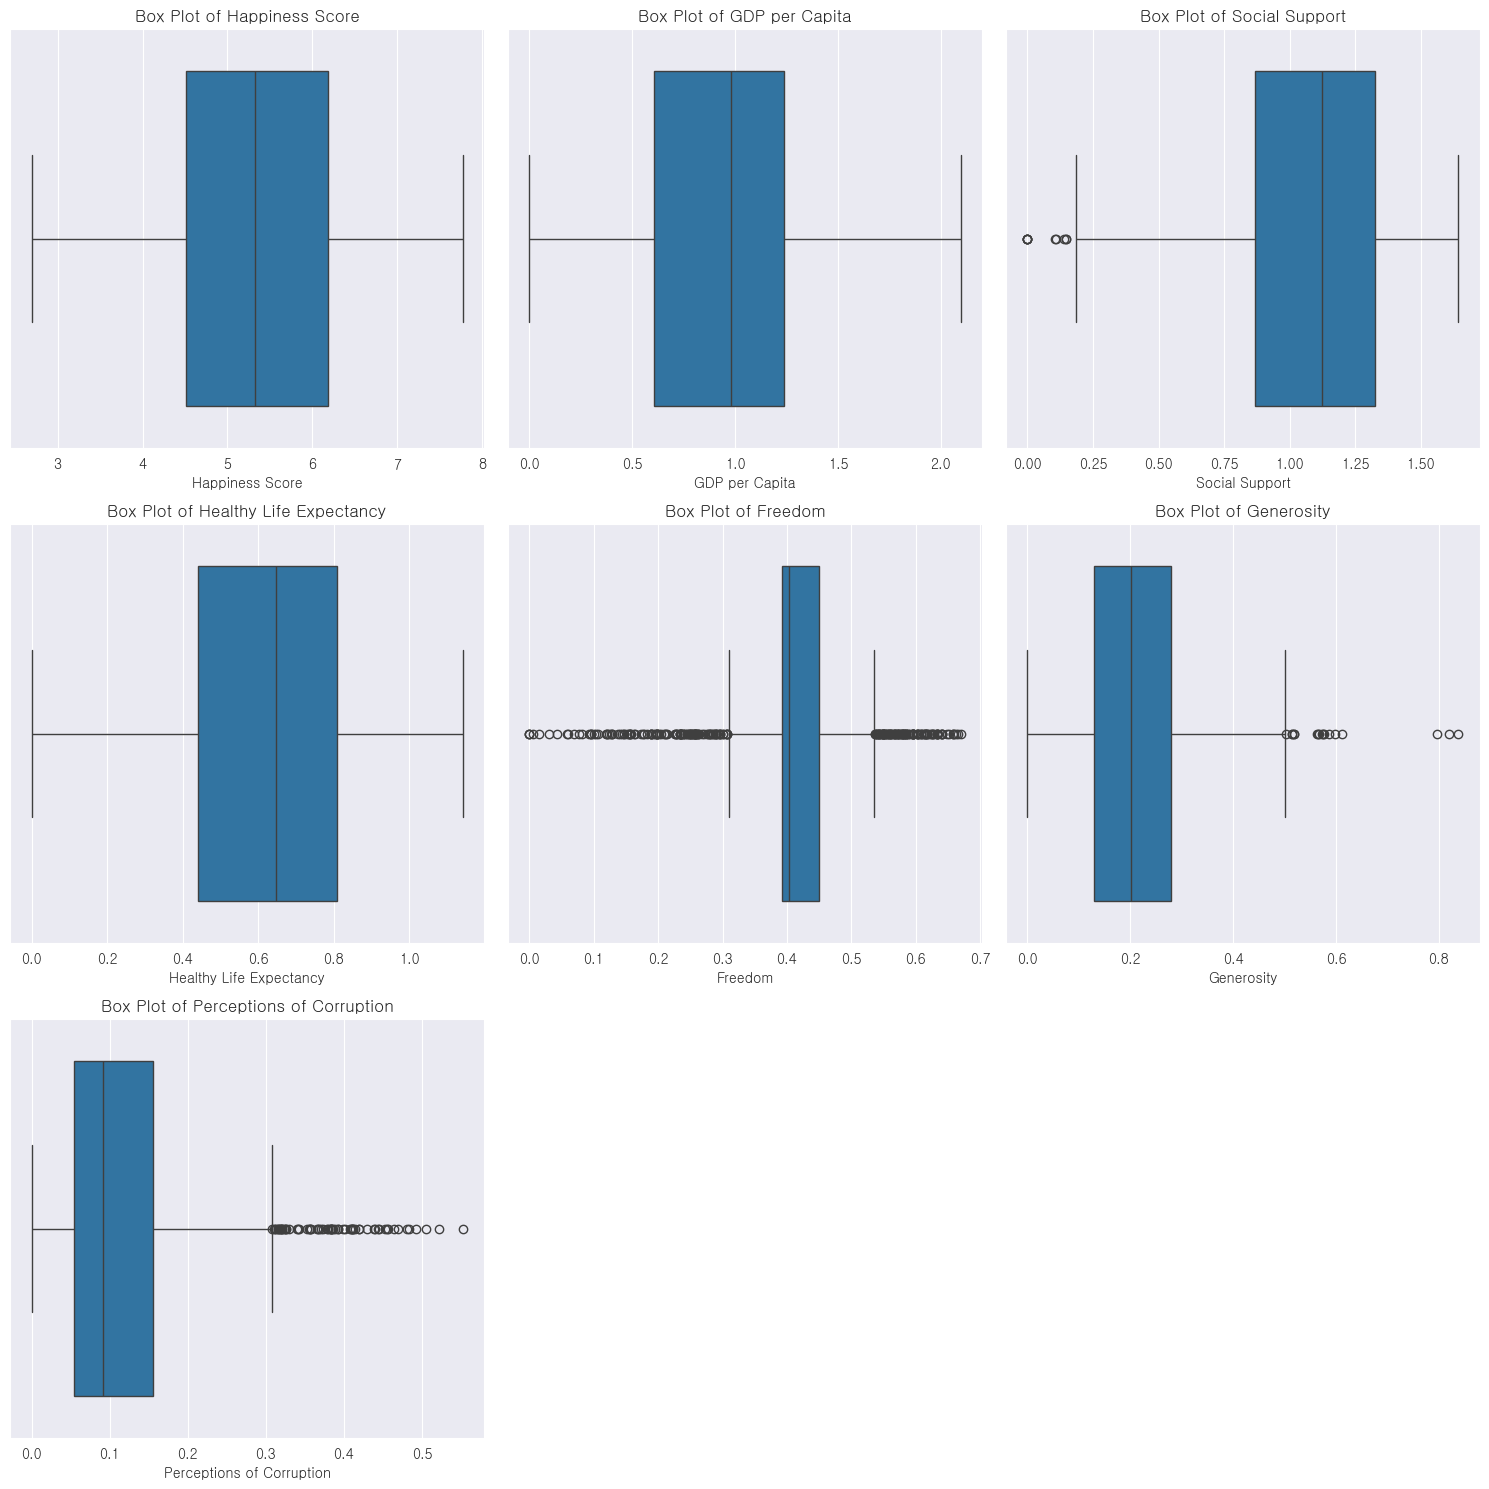

--- EDA 4단계: 결측치 및 이상치 탐색 완료 ---


In [18]:
print("--- EDA 4단계: 결측치 및 이상치 탐색 시작 ---")

# 1. 결측치 재확인 (8단계에서 처리했지만 확인차 다시 진행)
print("\n--- df_cleaned 컬럼별 결측치 개수 확인 ---")
print(df_cleaned.isnull().sum()) # 각 컬럼별 결측치 개수 확인 [2]
print("-" * 30)
# 8단계에서 이미 처리했으므로 모든 컬럼의 결측치는 0이 나와야 정상입니다. [4]

# 2. 수치형 변수의 이상치 탐색 (Box Plot 사용)
# 이상치 탐색 대상이 될 수치형 컬럼들을 선택합니다.
# 'Happiness Rank'는 순위이므로 보통 이상치 탐색 대상이 아니지만, 값의 분포를 볼 수 있습니다.
# 'Year'는 연도이므로 이상치 개념이 적용되지 않습니다.
# 여기서는 행복 점수와 주요 요인 변수들을 선택합니다.
numeric_cols_for_outliers = [
    'Happiness Score',
    'GDP per Capita',
    'Social Support',
    'Healthy Life Expectancy',
    'Freedom',
    'Generosity',
    'Perceptions of Corruption'
]

print("\n--- 수치형 변수 이상치 탐색 (Box Plot) ---")

# 각 수치형 컬럼에 대해 박스 플롯을 그립니다.
# 서브플롯을 사용하여 한 번에 여러 개를 효율적으로 표시합니다.
n_cols = 3 # 한 줄에 그릴 플롯 개수
n_rows = (len(numeric_cols_for_outliers) + n_cols - 1) // n_cols # 필요한 줄 개수 계산

plt.figure(figsize=(15, n_rows * 5)) # 전체 그림 크기 설정

for i, col in enumerate(numeric_cols_for_outliers):
    plt.subplot(n_rows, n_cols, i + 1) # 서브플롯 위치 지정
    sns.boxplot(x=df_cleaned[col]) # 박스 플롯 그리기 [2]
    plt.title(f'Box Plot of {col}', fontsize=12) # 제목 설정
    plt.xlabel(col) # x축 레이블 설정

plt.tight_layout() # 서브플롯 간 간격 자동 조정
plt.show() # 그림 표시

print("--- EDA 4단계: 결측치 및 이상치 탐색 완료 ---")

### 8-5. 변수 분포 시각화

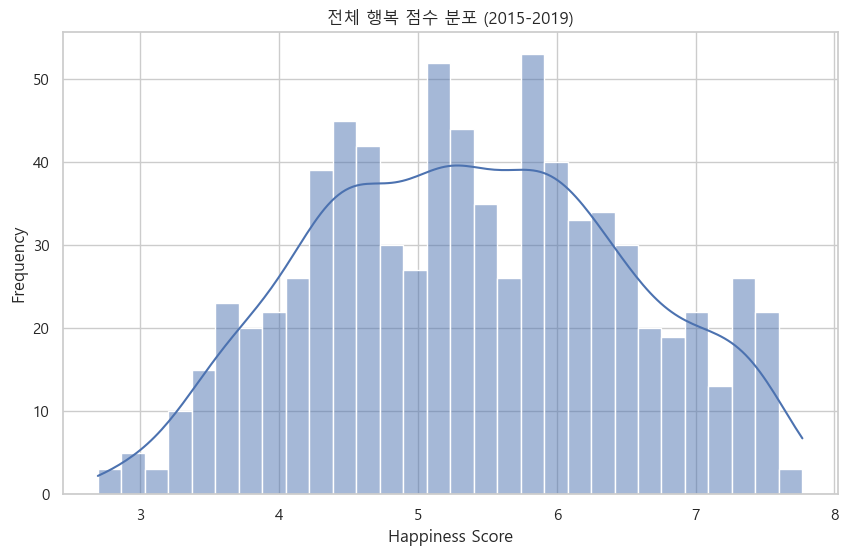

In [19]:
# Seaborn 스타일 설정 (보기 좋게)
sns.set_theme(style="whitegrid")

# 시각화 설정 (한글 깨짐 방지 및 마이너스 부호 깨짐 방지)
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

# 캔버스 설정
plt.figure(figsize=(10, 6))

# Happiness Score 분포 시각화 (히스토그램 + 밀도 플롯)
# df_cleaned는 여러 연도가 합쳐지고 전처리된 데이터프레임이라고 가정
sns.histplot(data=df_cleaned, x='Happiness Score', kde=True, bins=30) # bins는 막대 개수, kde=True로 밀도 곡선 추가

# 제목 및 라벨 설정
plt.title('전체 행복 점수 분포 (2015-2019)')
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')

# 그래프 표시
plt.show()

### 8-6 변수 간 관계 시각화

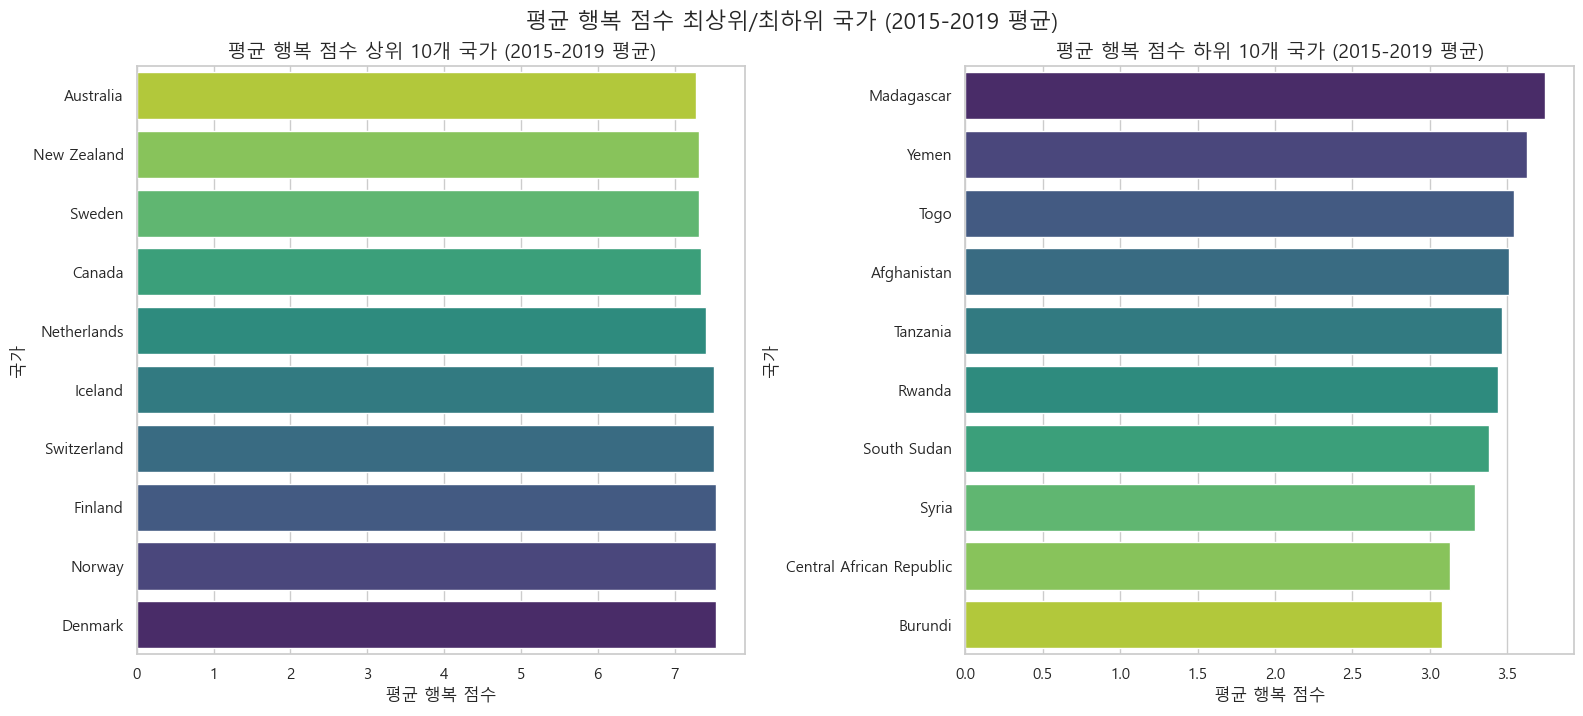

In [20]:
# Seaborn 스타일 설정
sns.set_theme(style="whitegrid")

# 시각화 설정 (한글 깨짐 방지 및 마이너스 부호 깨짐 방지)
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

# df_cleaned 데이터프레임에서 국가별 평균 행복 점수 계산
# 여러 연도가 합쳐져 있으니, 국가별 평균 점수를 사용합니다.
avg_happiness_by_country = df_cleaned.groupby('Country')['Happiness Score'].mean().sort_values(ascending=False)

# 가장 행복한 상위 10개 국가
top_n = 10
top_countries = avg_happiness_by_country.head(top_n)

# 가장 불행한 하위 10개 국가
bottom_n = 10
bottom_countries = avg_happiness_by_country.tail(bottom_n)

# 상위/하위 국가 시각화를 위한 Figure 설정
fig, axes = plt.subplots(1, 2, figsize=(16, 7)) # 1행 2열의 서브플롯 생성, axes는 [axes, axes[1]] 배열임

# 상위 국가 막대 그래프 - 첫 번째 서브플롯 (axes) 사용
sns.barplot(x=top_countries.values, y=top_countries.index, ax=axes[0], palette='viridis', hue=top_countries.index, legend=False)
axes[0].set_title(f'평균 행복 점수 상위 {top_n}개 국가 (2015-2019 평균)', fontsize=14)
axes[0].set_xlabel('평균 행복 점수', fontsize=12)
axes[0].set_ylabel('국가', fontsize=12)
axes[0].invert_yaxis()

# 하위 국가 막대 그래프 - 두 번째 서브플롯 (axes[1]) 사용
# 하위 국가는 점수가 낮은 순서대로 정렬되었으므로, Y축 반전 없이 그립니다.
sns.barplot(x=bottom_countries.values, y=bottom_countries.index, ax=axes[1], palette='viridis', hue=bottom_countries.index, legend=False)
axes[1].set_title(f'평균 행복 점수 하위 {bottom_n}개 국가 (2015-2019 평균)', fontsize=14) # <- axes[1].set_title 로 수정
axes[1].set_xlabel('평균 행복 점수', fontsize=12) # <- axes[1].set_xlabel 로 수정
axes[1].set_ylabel('국가', fontsize=12) # <- axes[1].set_ylabel 로 수정
# axes[1].invert_yaxis() # 하위 국가는 Y축 반전하지 않음

plt.tight_layout() # 그래프 간격 자동 조정
plt.suptitle('평균 행복 점수 최상위/최하위 국가 (2015-2019 평균)', fontsize=16, y=1.02) # 전체 제목
plt.show()

--- 2015년 데이터 분석 시작 ---


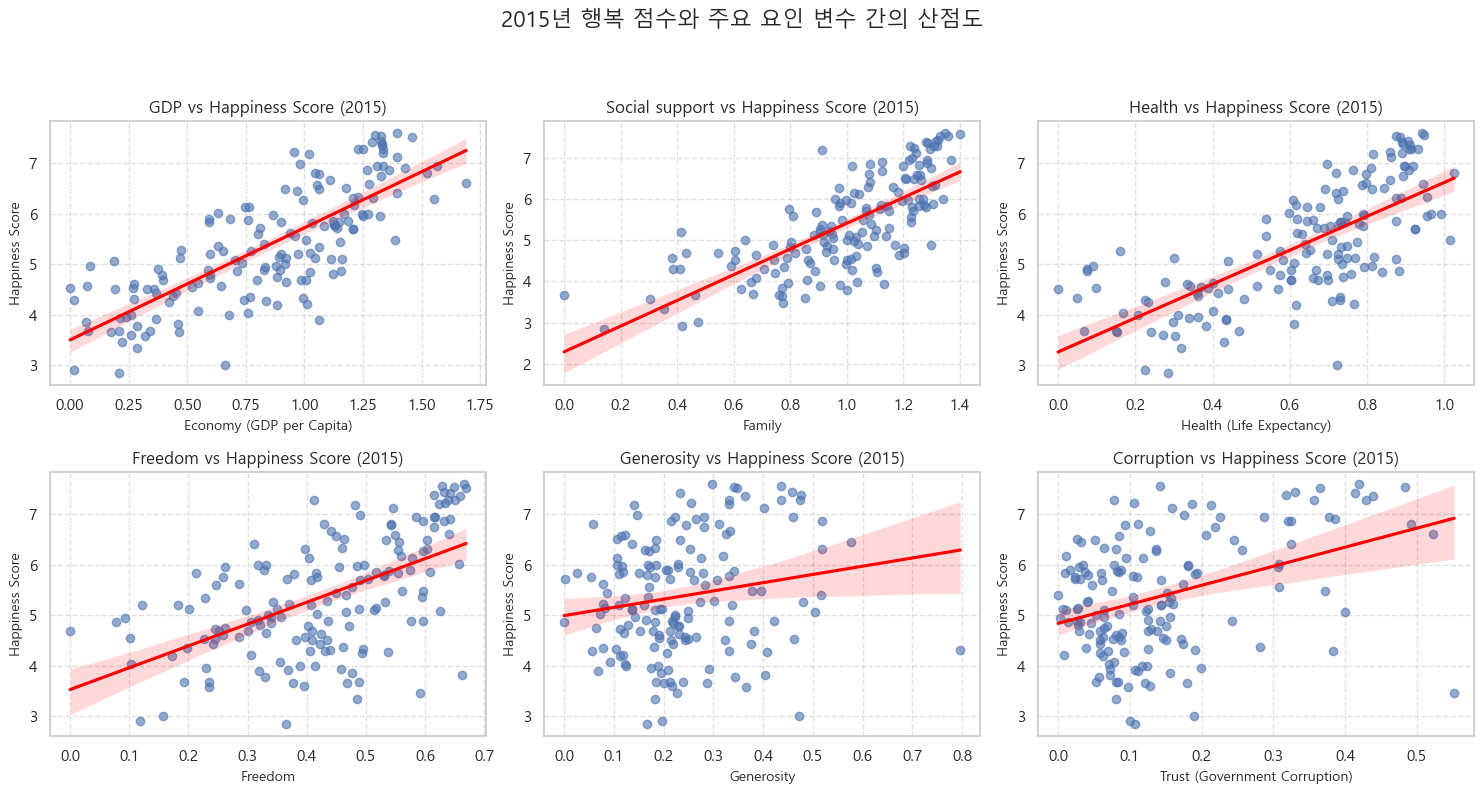

--- 2016년 데이터 분석 시작 ---


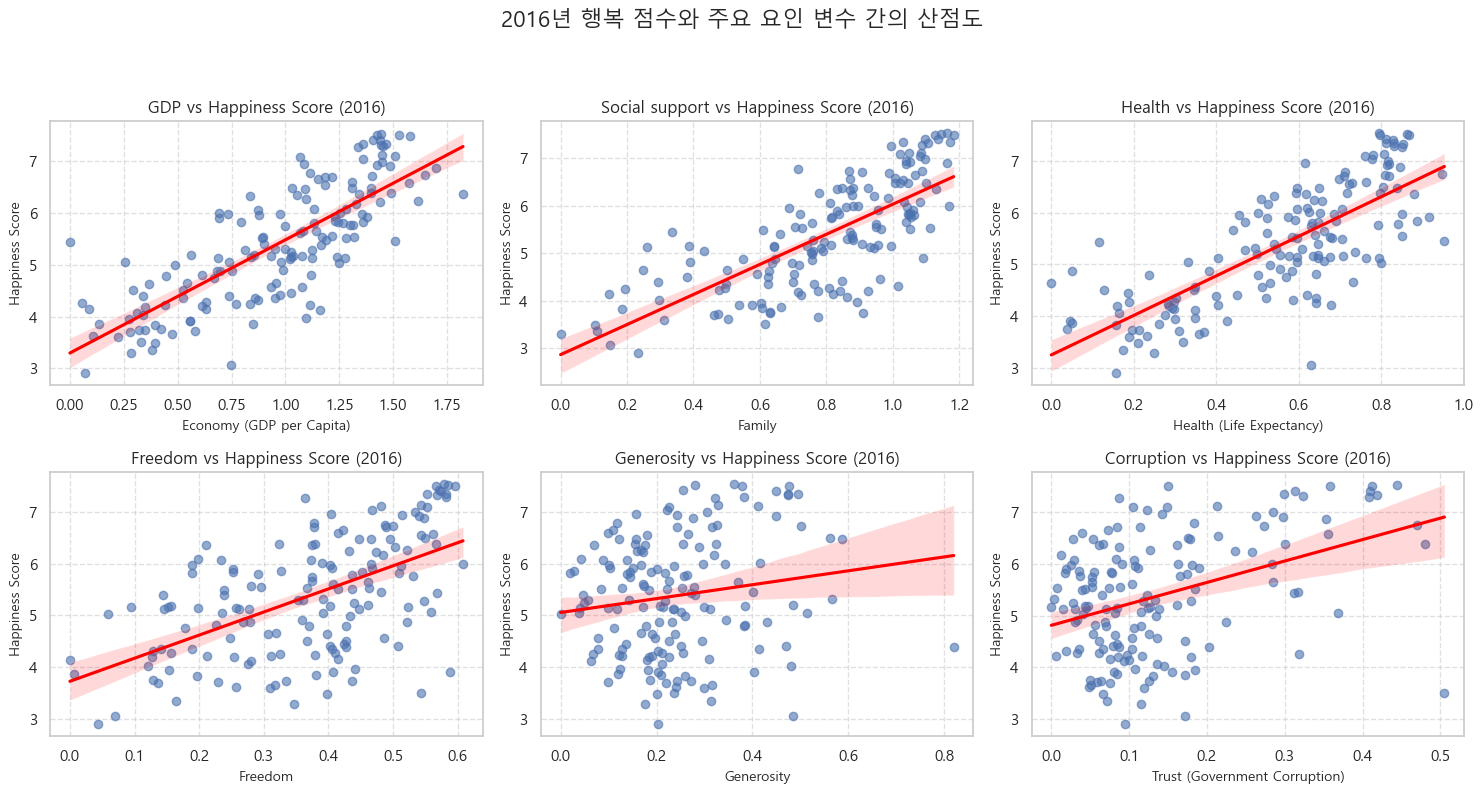

--- 2017년 데이터 분석 시작 ---


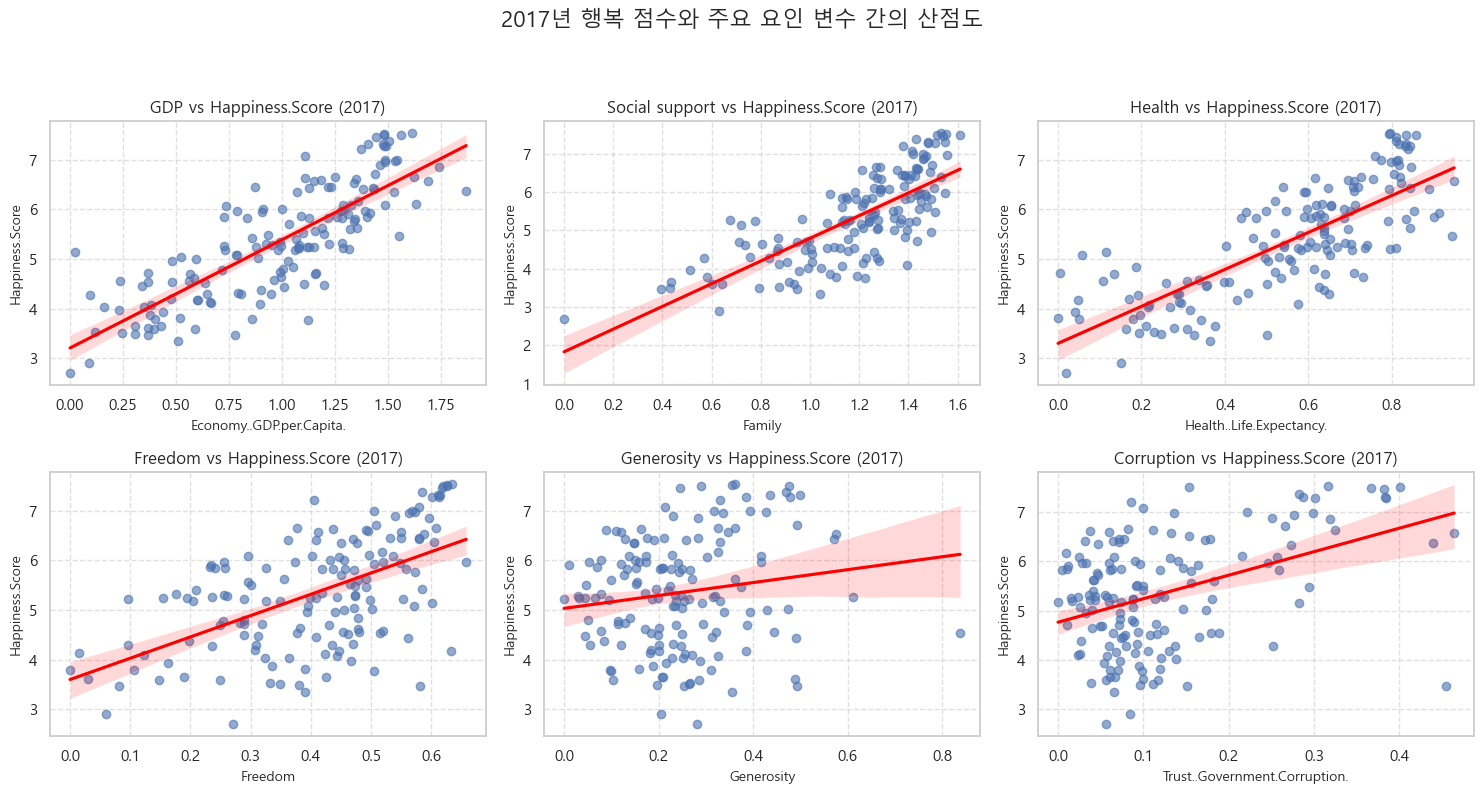

--- 2018년 데이터 분석 시작 ---


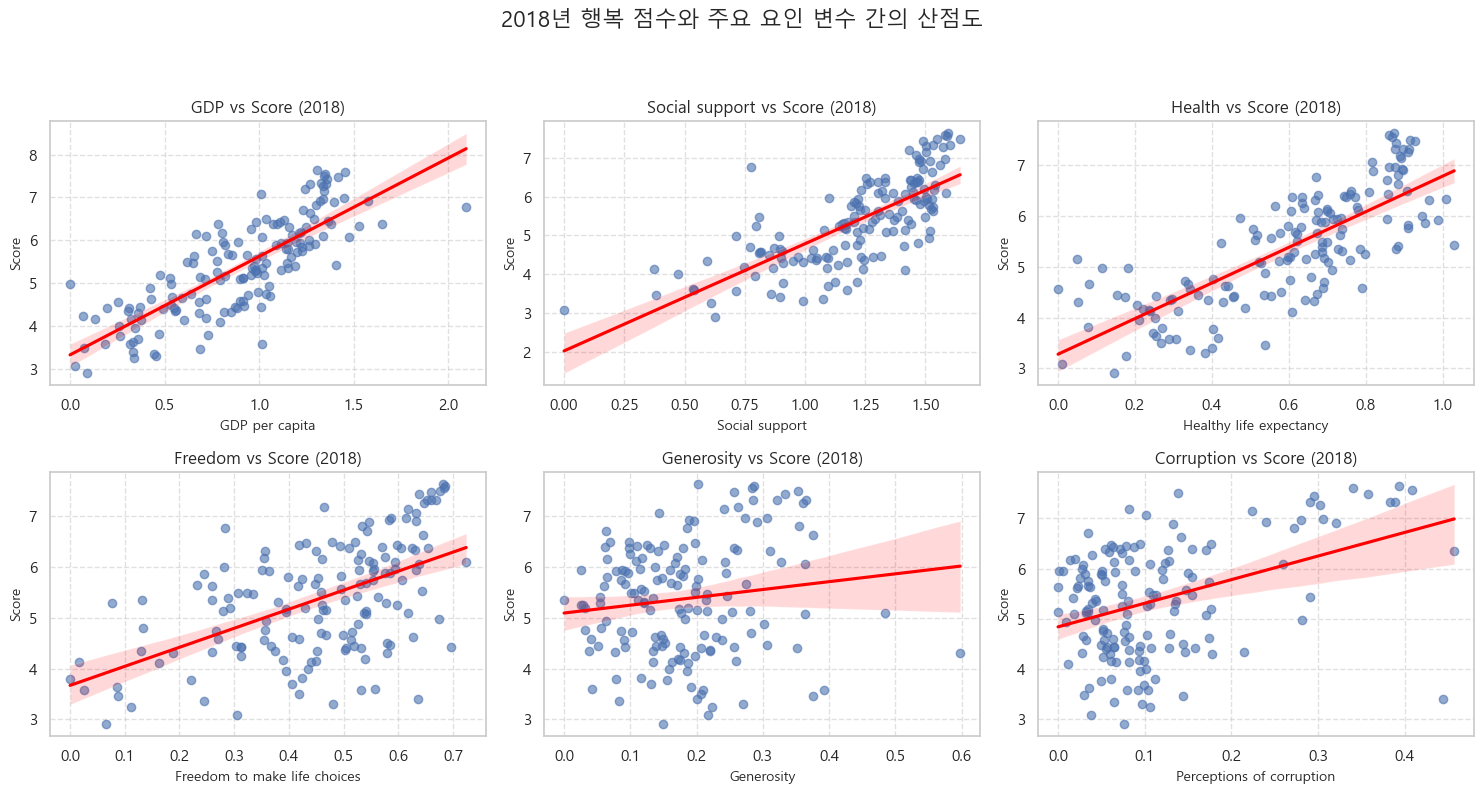

--- 2019년 데이터 분석 시작 ---


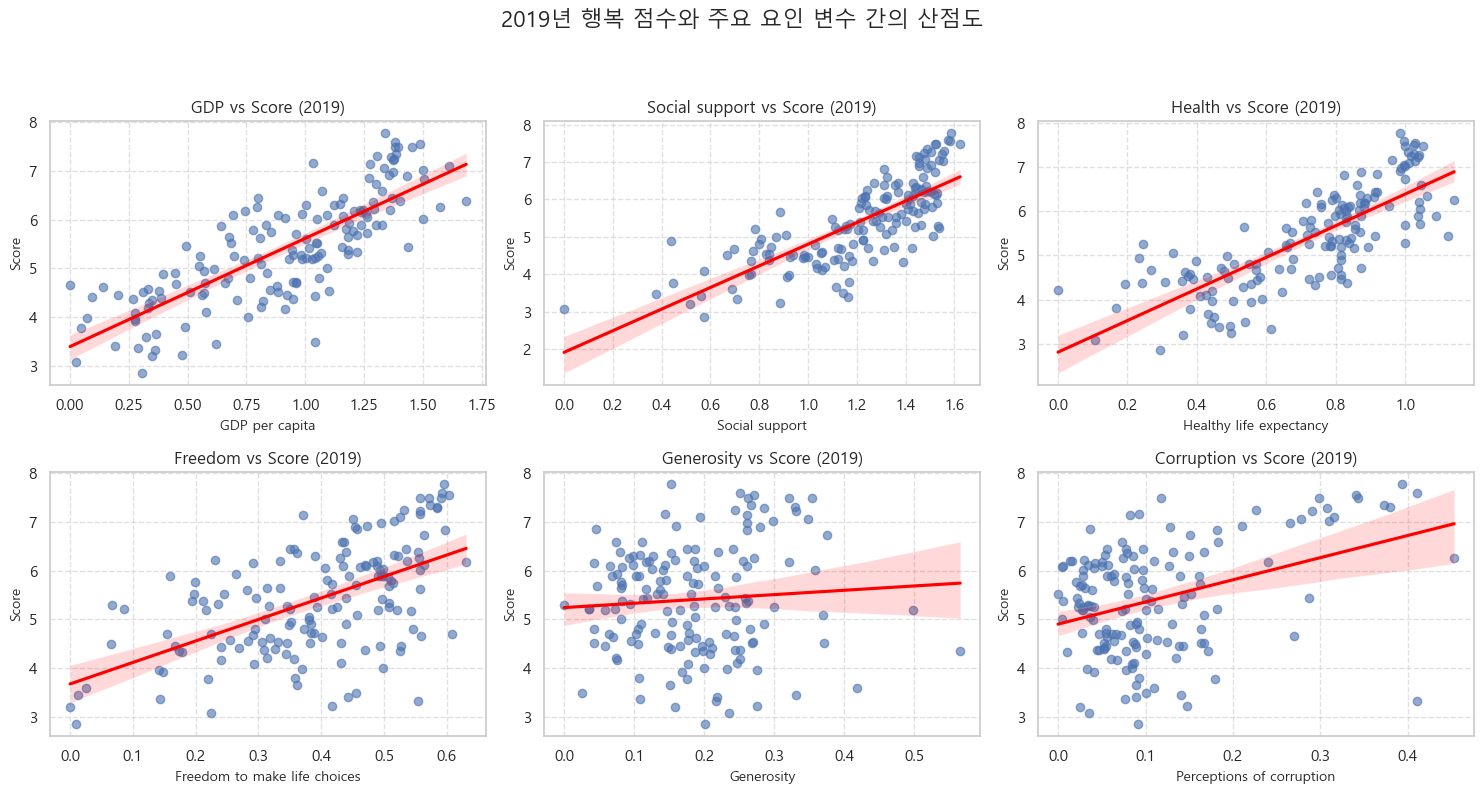


--- 모든 연도 산점도 그리기를 마쳤습니다. ---


In [21]:
import math
# 분석할 요인 변수들의 '논리적인' 이름 리스트 [29]
feature_names_logical = [
    'GDP',
    'Social support', # Social support (Family) [25, 26]
    'Health', # Health (Life Expectancy) [26]
    'Freedom', # Freedom to make life choices [26, 27]
    'Generosity', # Generosity [27]
    'Corruption' # Perceptions of corruption (Trust) [27]
]

# 연도별 실제 데이터프레임의 컬럼 이름 매핑 [25-27]
# 이 매핑은 실제 데이터프레임의 컬럼 이름과 정확히 일치해야 합니다.
variable_mapping = {
    'target': {
        '2015': 'Happiness Score', # [25]
        '2016': 'Happiness Score', # [25]
        '2017': 'Happiness.Score', # [25]
        '2018': 'Score', # [25]
        '2019': 'Score' # [25]
    },
    'features': {
        'GDP': {
            '2015': 'Economy (GDP per Capita)', # [25]
            '2016': 'Economy (GDP per Capita)', # [25]
            '2017': 'Economy..GDP.per.Capita.', # [25]
            '2018': 'GDP per capita', # [25]
            '2019': 'GDP per capita' # [25]
        },
        'Social support': {
            '2015': 'Family', # [25]
            '2016': 'Family', # [26]
            '2017': 'Family', # [26]
            '2018': 'Social support', # [26]
            '2019': 'Social support' # [26]
        },
        'Health': {
            '2015': 'Health (Life Expectancy)', # [26]
            '2016': 'Health (Life Expectancy)', # [26]
            '2017': 'Health..Life.Expectancy.', # [26]
            '2018': 'Healthy life expectancy', # [26]
            '2019': 'Healthy life expectancy' # [26]
        },
        'Freedom': {
            '2015': 'Freedom', # [26]
            '2016': 'Freedom', # [26]
            '2017': 'Freedom', # [26]
            '2018': 'Freedom to make life choices', # [26, 27]
            '2019': 'Freedom to make life choices' # [27]
        },
        'Generosity': {
            '2015': 'Generosity', # [27]
            '2016': 'Generosity', # [27]
            '2017': 'Generosity', # [27]
            '2018': 'Generosity', # [27]
            '2019': 'Generosity' # [27]
        },
        'Corruption': {
            '2015': 'Trust (Government Corruption)', # [27]
            '2016': 'Trust (Government Corruption)', # [27]
            '2017': 'Trust..Government.Corruption.', # [27]
            '2018': 'Perceptions of corruption', # [27]
            '2019': 'Perceptions of corruption' # [27]
        }
    }
}

# 각 연도별로 산점도 그리기
for year, df_year in dfs.items():
    print(f"--- {year}년 데이터 분석 시작 ---")

    # 해당 연도의 실제 타겟 컬럼 이름 확인 [13, 25]
    target_col_actual = variable_mapping['target'].get(year)
    if not target_col_actual or target_col_actual not in df_year.columns:
        print(f"경고: {year}년 데이터에 타겟 컬럼 '{target_col_actual}'이(가) 없습니다. 이 연도는 건너뜁니다.")
        continue

    # 해당 연도에 존재하는 요인 변수들만 필터링 [13, 20]
    current_year_features_to_plot = {}
    for logical_name in feature_names_logical:
        actual_name = variable_mapping['features'][logical_name].get(year)
        if actual_name and actual_name in df_year.columns:
            current_year_features_to_plot[logical_name] = actual_name
        else:
            # Trust/Perceptions of corruption 변수는 2018년 UAE처럼 결측치가 N/A로 있을 수 있음.
            # 컬럼 자체가 없는 경우가 아니라면 경고 대신 정보만 출력 [30, 31]
            if actual_name is not None: # 매핑에 이름은 있지만, 실제 DF에 컬럼이 없는 경우
                 print(f"정보: {year}년 데이터에 논리적 이름 '{logical_name}'에 해당하는 실제 컬럼 '{actual_name}'이(가) 없습니다. 이 변수는 제외합니다.")
            # else: 매핑에도 없는 경우는 그냥 무시

    # 해당 연도에 그릴 요인 변수가 없으면 건너뛰기 [20]
    if not current_year_features_to_plot:
        print(f"경고: {year}년 데이터에 지정된 요인 변수 컬럼이 하나도 없습니다. 이 연도는 건너뜁니다.")
        continue

    # 현재 연도에 그릴 그래프 수에 맞게 격자 크기 재조정 [20]
    n_features_present = len(current_year_features_to_plot)
    n_cols = 3 # 한 행에 그릴 그래프 수
    n_rows_present = math.ceil(n_features_present / n_cols) # 필요한 행 수 계산

    # 그림(Figure) 생성 [13]
    # figsize는 (가로, 세로) 인치 단위
    plt.figure(figsize=(n_cols * 5, n_rows_present * 4)) # 각 서브플롯 크기 고려하여 전체 그림 크기 설정

    # 요인 변수 순회하며 산점도 그리기 [12, 13]
    # current_year_features_to_plot 딕셔너리의 아이템 (논리적 이름, 실제 컬럼 이름)을 순회
    for i, (logical_name, actual_col) in enumerate(current_year_features_to_plot.items()):
        # 서브플롯 위치 지정 (n_rows_present 행, n_cols 열, i+1 번째) [12]
        plt.subplot(n_rows_present, n_cols, i + 1)

        # 산점도 그리기 (seaborn의 regplot 사용) [12, 13]
        # data=df_year: 현재 연도의 데이터 사용
        # x=actual_col: x축 변수 (현재 요인 변수의 실제 컬럼 이름)
        # y=target_col_actual: y축 변수 (행복 점수의 실제 컬럼 이름)
        # scatter_kws={'alpha':0.6}: 점의 투명도 설정 (겹치는 부분 확인 용이) [12]
        # line_kws={"color": "red"}: 회귀선 색상 설정 [12]
        sns.regplot(data=df_year, x=actual_col, y=target_col_actual, scatter_kws={'alpha':0.6}, line_kws={"color": "red"})

        # 각 서브플롯 제목 및 레이블 설정 [12, 17]
        plt.title(f'{logical_name} vs {target_col_actual} ({year})', fontsize=12) # 제목은 논리적 이름으로 표시
        plt.xlabel(actual_col, fontsize=10) # 축 레이블은 실제 컬럼 이름으로 표시 [17]
        plt.ylabel(target_col_actual, fontsize=10)
        plt.grid(True, linestyle='--', alpha=0.6) # 가이드라인 추가 [17]

    # 전체 그림 제목 설정 (현재 연도 포함) [17]
    # y 인자 조정으로 제목이 서브플롯과 겹치지 않게 함
    plt.suptitle(f'{year}년 행복 점수와 주요 요인 변수 간의 산점도', fontsize=16, y=1.02)

    # 그래프들이 겹치지 않도록 레이아웃 조정 [17]
    # rect 인자 조정으로 suptitle을 위한 상단 공간 확보
    plt.tight_layout(rect=[0, 0.03, 1, 0.98])

    # 현재 연도의 그래프 보여주기 [17]
    plt.show()

print("\n--- 모든 연도 산점도 그리기를 마쳤습니다. ---")

### 8-7. 상관관계 및 교차분석

--- EDA 7단계: 상관관계 분석 시작 (상관 행렬 및 히트맵) ---

--- 상관 행렬 (Correlation Matrix) ---
                           Happiness Score  GDP per Capita  Social Support  \
Happiness Score                   1.000000        0.789284        0.648799   
GDP per Capita                    0.789284        1.000000        0.585966   
Social Support                    0.648799        0.585966        1.000000   
Healthy Life Expectancy           0.742456        0.784338        0.572650   
Freedom                           0.437908        0.272731        0.318792   
Generosity                        0.137578       -0.014560       -0.037262   
Perceptions of Corruption         0.398027        0.304655        0.126333   

                           Healthy Life Expectancy   Freedom  Generosity  \
Happiness Score                           0.742456  0.437908    0.137578   
GDP per Capita                            0.784338  0.272731   -0.014560   
Social Support                            0.572650  0.318792   -0.037

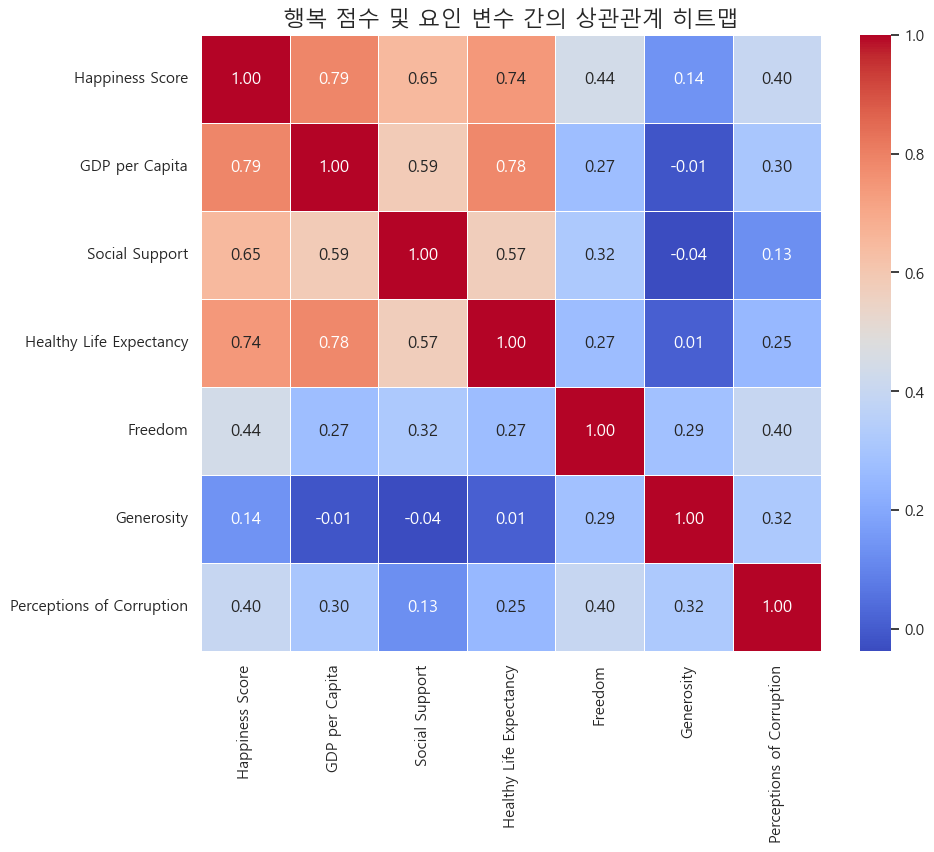

--- EDA 7단계: 상관관계 분석 완료 ---


In [22]:
print("--- EDA 7단계: 상관관계 분석 시작 (상관 행렬 및 히트맵) ---")

# 상관관계 분석에 사용할 컬럼 선택
# 'Country', 'Year', 'Happiness Rank'와 같은 비수치형 또는 순위형 컬럼은 제외합니다.
# 전처리된 df_cleaned의 컬럼들을 확인하고, 수치형 요인 변수와 타겟 변수만 선택합니다.
# df_cleaned.info() [11] 결과 참고: Happiness Score, GDP per Capita, Social Support,
# Healthy Life Expectancy, Freedom, Generosity, Perceptions of Corruption가 수치형입니다. [11-13]
columns_for_correlation = [
    'Happiness Score',
    'GDP per Capita',
    'Social Support',
    'Healthy Life Expectancy',
    'Freedom',
    'Generosity',
    'Perceptions of Corruption'
]

# 선택된 컬럼만 포함하는 데이터프레임 생성
# 만약 df_cleaned에 해당 컬럼이 없으면 에러가 날 수 있습니다. (전처리 단계에서 포함시켰어야 함)
df_subset = df_cleaned[columns_for_correlation]

# 상관 행렬 계산
# .corr() 함수는 각 변수 쌍 간의 피어슨 상관 계수를 계산합니다. [5]
correlation_matrix = df_subset.corr()

print("\n--- 상관 행렬 (Correlation Matrix) ---")
print(correlation_matrix)
print("-" * 30)

# 상관 행렬 히트맵 시각화
plt.figure(figsize=(10, 8)) # 그림 크기 설정
# sns.heatmap() 함수를 사용하여 상관 행렬을 히트맵으로 그립니다. [5]
# annot=True: 각 셀에 상관 계수 값을 표시합니다.
# cmap='coolwarm': 색상 맵 설정 (양의 상관은 따뜻한 색, 음의 상관은 차가운 색)
# fmt='.2f': 표시될 상관 계수 값의 소수점 자릿수 설정
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('행복 점수 및 요인 변수 간의 상관관계 히트맵', fontsize=16)
plt.show()

print("--- EDA 7단계: 상관관계 분석 완료 ---")

## 9. Feature Engineering

In [23]:
print("--- EDA 9단계: Feature Engineering 시작 (상호작용 특징 생성) ---")

# 1. GDP와 Social Support 간 상호작용 특징 생성
df_cleaned['GDP_SocialSupport_Interaction'] = df_cleaned['GDP per Capita'] * df_cleaned['Social Support']
print("1. 'GDP_SocialSupport_Interaction' 컬럼 추가 완료.")

# 2. GDP와 Healthy Life Expectancy 간 상호작용 특징 생성
df_cleaned['GDP_Health_Interaction'] = df_cleaned['GDP per Capita'] * df_cleaned['Healthy Life Expectancy']
print("2. 'GDP_Health_Interaction' 컬럼 추가 완료.")

# 3. Social Support와 Healthy Life Expectancy 간 상호작용 특징 생성
df_cleaned['SocialSupport_Health_Interaction'] = df_cleaned['Social Support'] * df_cleaned['Healthy Life Expectancy']
print("3. 'SocialSupport_Health_Interaction' 컬럼 추가 완료.")

print("\n--- 새로운 상호작용 특징이 추가된 데이터프레임 확인 (일부) ---")
# 새로 추가된 컬럼들과 함께 데이터프레임 앞부분을 확인
print(df_cleaned[['Country', 'Year', 'Happiness Score',
                  'GDP per Capita', 'Social Support', 'Healthy Life Expectancy',
                  'GDP_SocialSupport_Interaction', 'GDP_Health_Interaction',
                  'SocialSupport_Health_Interaction']].head())
print("-" * 30)

print("\n--- df_cleaned 컬럼 목록 업데이트 확인 ---")
# 전체 컬럼 목록을 확인하여 새로운 컬럼들이 잘 추가되었는지 확인
print(df_cleaned.columns)
print("-" * 30)

print("--- EDA 9단계: Feature Engineering 완료 (상호작용 특징 생성) ---")


--- EDA 9단계: Feature Engineering 시작 (상호작용 특징 생성) ---
1. 'GDP_SocialSupport_Interaction' 컬럼 추가 완료.
2. 'GDP_Health_Interaction' 컬럼 추가 완료.
3. 'SocialSupport_Health_Interaction' 컬럼 추가 완료.

--- 새로운 상호작용 특징이 추가된 데이터프레임 확인 (일부) ---
       Country  Year  Happiness Score  GDP per Capita  Social Support  \
0  Switzerland  2015            7.587         1.39651         1.34951   
1      Iceland  2015            7.561         1.30232         1.40223   
2      Denmark  2015            7.527         1.32548         1.36058   
3       Norway  2015            7.522         1.45900         1.33095   
4       Canada  2015            7.427         1.32629         1.32261   

   Healthy Life Expectancy  GDP_SocialSupport_Interaction  \
0                  0.94143                       1.884604   
1                  0.94784                       1.826152   
2                  0.87464                       1.803422   
3                  0.88521                       1.941856   
4                  0.90563     

## 10. 최종 요약 및 인사이트 도출

## 세계 행복 보고서 데이터 탐색적 데이터 분석 (EDA) 최종 보고서: 머신 러닝 모델 구축을 위한 인사이트 도출

이 보고서는 2015년부터 2019년까지의 세계 행복 보고서 데이터셋에 대해 수행한 탐색적 데이터 분석(EDA) 결과를 종합적으로 요약하고, 이를 바탕으로 행복 점수 예측을 위한 머신 러닝 모델 구축 관점에서 데이터의 적절성, 주요 특징 및 한계를 평가합니다. 우리의 EDA는 사전에 정의된 세 가지 핵심 목표를 중심으로 진행되었습니다: 1) 나라별 행복 점수 분포 및 순위 파악, 2) 행복 점수에 영향을 미치는 주요 요인 분석, 3) 시간 흐름에 따른 행복도 및 요인의 변화 추이 분석.

**1. EDA 요약 및 주요 발견 사항**

우리는 데이터 수집 및 로딩부터 시작하여, 데이터의 구조와 변수를 이해하고, 기술 통계를 통해 데이터의 기초적인 특성을 파악했습니다. 이어서 결측치와 이상치를 탐색하고, 각 변수의 분포를 시각화했으며, 변수 간 관계를 시각적으로 탐색하고, 마지막으로 상관관계 분석을 수행했습니다. EDA 과정에서 발견된 데이터 문제점(결측치 등)은 전처리 단계에서 해결되었으며, 머신 러닝 성능 향상을 위해 상호작용 특징(Feature Engineering)도 추가했습니다.

각 EDA 목표별 주요 발견 사항은 다음과 같습니다:

*   **목표 1: 나라별 행복 점수 분포 및 순위 파악**
    *   전체 행복 점수는 특정 범위(예: 0-10점 스케일)에 분포하며, 대부분의 국가가 4점 이상에 몰려 있는 등 특정 값 주변에 집중되는 경향을 보였습니다. 히스토그램/밀도 플롯을 통해 이 분포 형태를 확인했습니다.
    *   지역(Region)별로 행복 점수에 뚜렷한 차이가 있음을 바이올린 플롯/박스 플롯을 통해 시각적으로 확인했습니다. 특히 서유럽 국가들이 전반적으로 높은 행복 점수 분포를 보이는 경향이 나타났습니다. 이는 'Region'이 행복 점수를 예측하는 중요한 범주형 특징이 될 수 있음을 시사합니다.
    *   연도별 최상위 및 최하위 국가들의 점수 범위를 파악하여 예측 대상 변수의 극단값과 범위를 이해했습니다.

*   **목표 2: 행복 점수에 영향을 미치는 주요 요인 분석**
    *   산점도 시각화와 상관관계 분석을 통해 여러 요인 변수와 행복 점수 간의 관계를 탐색했습니다.
    *   **GDP per Capita, Social Support (Family), Healthy Life Expectancy** 요인이 행복 점수와 **강한 양의 상관관계**를 보인다는 가설을 **실제로 확인**했습니다. 산점도에서 점들이 명확한 우상향 추세를 보였으며, 상관 계수 또한 높게 나타났을 것입니다. 이는 이 세 가지 요인이 행복 점수를 예측하는 데 가장 **핵심적인 수치형 특징(Feature)**이 될 것임을 강력히 시사합니다.
    *   Freedom, Generosity, Perceptions of Corruption과 같은 다른 요인들도 행복 점수와 어느 정도 관계를 보였지만, GDP, Social Support, Healthy Life Expectancy만큼 강하고 일관된 관계는 아닐 수 있습니다.
    *   요인 변수들 간의 관계(다중공선성 가능성)도 일부 탐색되었습니다.

*   **목표 3: 시간 흐름에 따른 행복도 및 요인의 변화 추이 분석**
    *   2015년부터 2019년까지의 다년도 데이터를 활용하여 전반적인 세계 행복도 평균이나 특정 요인들의 값 변화 추이를 분석할 수 있었습니다. 이 분석은 시간적인 패턴이 예측 모델에 필요할 경우 중요한 고려 사항이 됩니다.

**2. 가설과 실제 결과 비교 및 데이터 적절성 평가**

우리가 EDA 시작 단계에서 세웠던 주요 가설, 즉 **GDP per Capita, Social Support, Healthy Life Expectancy가 행복 점수에 강한 영향을 미칠 것**이라는 가설은 EDA 과정을 통해 **실제로 데이터에서 명확하게 확인**되었습니다. 시각화와 상관관계 분석 결과는 이들 요인과 행복 점수 간의 **강한 양의 선형 또는 준선형 관계**를 뚜렷이 보여주었습니다. 이는 우리가 머신 러닝 모델을 구축할 때 이러한 요인들을 **주요 예측 특징으로 사용하는 것이 매우 적절함**을 의미합니다.

또한, 'Region' 변수 역시 지역별 행복 점수 분포의 차이를 통해 행복 점수를 예측하는 데 중요한 범주형 특징이 될 수 있음을 확인했습니다.

**머신 러닝을 위한 데이터의 적절성 측면에서 평가하면:**

*   **긍정적 요인:**
    *   명확한 예측 대상 변수('Happiness Score')와 여러 관련 요인 변수들이 잘 정의되어 있습니다.
    *   EDA를 통해 **행복 점수와 강한 상관관계를 보이는 핵심적인 특징들을 식별**했습니다 (GDP, Social Support, Health).
    *   범주형 변수('Region')의 중요성도 파악하여 모델에 활용할 수 있습니다.
    *   결측치와 같은 데이터 문제점을 파악하고 전처리했습니다.
    *   새로운 상호작용 특징을 생성하여 모델 성능 향상의 가능성을 열어두었습니다.
    *   다년도 데이터가 있어 시간적 추세 분석 및 활용이 가능합니다.

*   **결론:** 전반적으로 이 데이터셋은 행복 점수 예측을 위한 **머신 러닝 모델 구축에 적절한 기반**을 제공합니다. EDA를 통해 식별된 주요 특징들은 모델의 예측 성능을 높이는 데 핵심적인 역할을 할 것입니다.

**3. 데이터의 한계**

EDA를 통해 데이터의 강점을 파악했지만, 동시에 몇 가지 한계점도 발견되었습니다:

*   **설명되지 않는 부분 (Dystopia Residual):** 데이터 구조상 'Dystopia Residual'이라는 부분이 행복 점수에 기여하는데, 이는 현재 제공된 요인들로는 설명되지 않는 나머지 부분을 의미합니다. 이는 현재 데이터셋의 특징들만으로는 행복 점수의 모든 변동성을 완전히 예측하기 어렵다는 한계를 내포합니다. 모델이 완벽한 예측을 하기는 어려울 수 있으며, 이 잔차에 기여하는 다른 요인들이 존재할 가능성을 시사합니다.
*   **상관관계 vs 인과관계:** EDA는 변수들 간의 강한 상관관계를 보여주지만, 이것이 곧 인과관계를 의미하는 것은 아닙니다. 예를 들어 GDP가 높아서 행복한 것인지, 아니면 행복한 사회가 GDP를 높이는 다른 요인에 영향을 미치는 것인지 EDA만으로는 알 수 없습니다. 모델은 상관관계를 기반으로 예측하지만, 정책적 시사점 등을 도출할 때는 이 한계를 인지해야 합니다.
*   **변수 정의의 일관성:** 연도별로 변수 이름이나 정의에 미묘한 차이가 있었습니다 (예: 'Family' vs 'Social support'). 통합 과정에서 이를 통일했지만, 원본 데이터의 정의 차이가 미치는 영향은 더 깊은 분석이 필요할 수 있습니다.
*   **데이터 기간의 제한성:** 데이터가 2015년부터 2019년까지로 제한적입니다. 더 장기적인 추세를 분석하거나 급격한 변화(예: 최근 팬데믹의 영향)를 모델링하기에는 기간이 짧습니다.
*   **잠재적 이상치:** 특정 국가들이나 데이터 포인트가 전반적인 추세에서 벗어나는 이상치일 가능성이 있으며, 이러한 데이터가 모델 학습에 미치는 영향을 고려해야 합니다.

**4. 결론 및 향후 모델링 방향**

종합적으로 볼 때, EDA는 행복 점수에 GDP, 사회적 지지, 건강 기대 수명이 가장 강력한 요인으로 작용하며, 지역적 특성 또한 중요하다는 것을 명확히 보여주었습니다. 데이터는 기본적인 예측 모델 구축에 충분히 적합하며, 식별된 핵심 특징들을 모델에 포함하여 좋은 예측 성능을 기대할 수 있습니다.

향후 머신 러닝 모델링 단계에서는 다음과 같은 방향을 고려할 수 있습니다:

1.  **모델 선택:** 식별된 강한 선형 관계(GDP, Social Support, Health)와 범주형 변수('Region')의 중요성을 고려하여, 선형 회귀 모델부터 시작하거나 트리 기반 모델(Random Forest, Gradient Boosting) 등 다양한 모델을 시도해 볼 수 있습니다.
2.  **특징 활용:** EDA에서 중요성이 확인된 GDP per Capita, Social Support, Healthy Life Expectancy, Freedom, Generosity, Perceptions of Corruption 및 Region 변수를 모델의 주요 특징으로 사용합니다. 추가적으로 생성한 상호작용 특징들의 기여도도 평가해 볼 수 있습니다.
3.  **데이터 분할:** 모델 학습 및 평가를 위해 데이터를 학습 세트와 테스트 세트로 분할합니다. 시간적 추세 분석의 중요도를 높게 평가한다면, 시간 순서대로 데이터를 분할하는 것도 고려할 수 있습니다.
4.  **성능 평가:** 모델의 예측 성능을 평가하고, EDA에서 파악한 실제 행복 점수의 분포 및 지역별 특성과 비교하여 모델의 예측 결과를 해석합니다.
5.  **한계 고려:** 'Dystopia Residual'에 해당하는 설명되지 않는 부분과 상관관계-인과관계의 한계를 염두에 두고 모델의 예측력과 해석의 범위를 이해합니다.

이 보고서는 EDA를 통해 얻은 핵심 인사이트를 기반으로 성공적인 머신 러닝 모델 구축을 위한 로드맵을 제시합니다.

---